In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize
import os

from JJ_data_processing import *
from JJformulas import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

from scipy.optimize import curve_fit


D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [3]:
def xy_by_id(idx):
    alldata = get_data_by_id(idx)
    
    x = alldata[0][0]['data']
    y = alldata[0][1]['data']
    
    return x,y

In [4]:
def extract_Isw_R0_by_id (idx):
    
    alldata = get_data_by_id(idx)
    
    Is = alldata[0][0]['data']
    Vs = alldata[0][1]['data']

        
    return extract_Isw_R0 (Is,Vs)

In [5]:
def populate_exps (exps, VERBOSE = False):

    texps = tqdm_notebook(exps)
    for exp in texps:

        Isws = []
        R0s = []

        if VERBOSE:
            fig, ax = plt.subplots()

        Is = []
        Vs = []

        Irs = []
        Vrs = []

        Ils = []
        Vls = []

        for i in exp['ids']:

            I, V = xy_by_id(i)

            Tb = exp['T']

            ind_Vmax = np.argmax(I)
            ind_Vmin = np.argmin(I)

            ind_I0 = np.argmin(abs(I - 0e-12))
            ind_near0 = np.where(abs(I) < 10e-12)


    #         V_off = (V[ind_Vmax] + V[ind_Vmin])/2

            V_off = V[ind_I0]
#             V_off = np.mean(V[ind_near0])


            V -= V_off
    #         I, V = offsetRemove(I,V, offX = 25.5e-12, offY = 35e-6)


            I, V = cut_dxdy(I, V, dx = 2e-9 ,dy = 80e-6)

    #         I = I - Iqp(  V, T = Tb, G1 = 1/20.06e3, G2 = 1/120e3, V0 = 0.35e-3 ) 

            g0 = np.where(I>0)
            l0 = np.where(I<0)

            Ir, Vr = I[g0], V[g0]
            Il, Vl = I[l0], V[l0]


            if VERBOSE:
                ax.plot(I,V, 'o')

            Isw, R0 = extract_Isw_R0 (I,V)
            Isws.append(Isw)
            R0s.append(R0)


            Is.append(I)
            Vs.append(V)

            Irs.append(Ir)
            Vrs.append(Vr)

            Ils.append(Il)
            Vls.append(Vl)



        exp ['Is' ] =  Is
        exp ['Vs' ] =  Vs

        exp ['Irs' ] =  Irs
        exp ['Vrs' ] =  Vrs

        exp ['Ils' ] =  Ils
        exp ['Vls' ] =  Vls



        exp ['Isws'] =  np.array(Isws)
        exp ['R0s' ] =  np.array(R0s )
        exp ['cos' ] =  np.array( abs(np.cos(np.pi*(exp['B'] - ZF )/(2* (FF - ZF)  )) ) )


# 55B1

In [6]:
os.getcwd()

'e:\\OneDrive - Rutgers University\\files_GitHub\\JJ_arrays'

In [7]:
os.listdir(os.getcwd()+'\..\ExdData')

['.git', '.gitattributes', 'Experiments_55B1.db']

In [729]:
SAMPLE = '55B1'

qc.config["core"]["db_location"] = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)


In [5]:
def plot_by_B(exp, B, ax = None,**kw):
   
    ind =   np.argmin ( np.abs( exp['B'] - B ))
    
    I, V = xy_by_id( exp['ids'][ind] )
    
#     I = I - V/1.3e9

    if ax == None:
        fig, ax = plt.subplots()
        
    ax.plot( I, V, label = 'T = {:2.0f} mK, B = {:1.2f} mA'.format( exp['T']/1e-3, exp['B'][ind] /1e-3) , **kw)
    ax.legend()

<IPython.core.display.Javascript object>


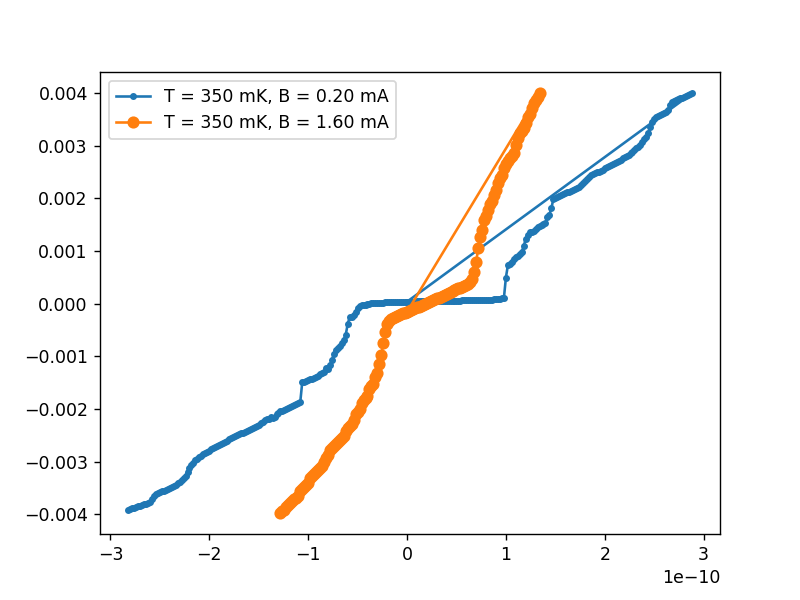

In [12]:
offX = 24.5e-12
offY = 50e-6

fig, ax = plt.subplots()

Vs = np.linspace (-4e-3, 4e-3, 101)

# for  exp in[ exps[0],exps[7],exps[9],exps[10]]:
for  exp in[ exps[10]]:

    Tb = exp['T']
    Is = Iqp(  Vs - offY  , T = Tb, G1 = 1/20.06e3, G2 = 1/120e3, V0 = 0.35e-3 ) + offX
    
    
    plot_by_B(exp, ZF, ax, marker = '.')
    plot_by_B(exp, FF, ax, marker = 'o')
    
#     ax.plot(Is, Vs)
    
#     ax.set_xlim(0, 1.5e-10)
#     ax.set_ylim(-1e-3, 4e-3)

## List of exp

**list of run_ids*
#73-173: IVC for T=45mK, Blist = np.linspace(0,2e-3,101), Vthr = 4mV
#174-228: Full IVC for T=45mK, Blist = np.linspace(0,2e-3,51), Vthr = 8mV
#229,230: Full IVC for T=80mK, Blist = [ZF,FF]
#231,232: Full IVC for T=100mK, Blist = [ZF,FF]
#233,234: Full IVC for T=125mK, Blist = [ZF,FF]
#236,237: Full IVC for T=150mK, Blist = [ZF,FF]
#238,239: Full IVC for T=175mK, Blist = [ZF,FF]
#246-297: Full IVC for T=200mK, Blist = np.linspace(1e-3, 2e-3, 51), Vthr = 4mV
#300-305: Full IVC for T=200mK, Blist = np.linspace(1e-3, 2e-3, 6), Vthr = 8mV
#306-356: Full IVC for T=300mK, Blist = np.linspace(1e-3, 2e-3, 51), Vthr = 4mV
#357-359: check full frustration periodicity
#360-410: Full IVC for T=350mK, Blist = np.linspace(1e-3, 2e-3, 51), Vthr = 4mV
#411-421: Full IVC for T=350mK, Blist = np.linspace(0e-3, 2e-3, 11), Vthr = 8mV


In [229]:
ZF = .22e-3
FF = 1.6e-3

keys  = ['ids',                  'T',          'B',                      'Vthr']



valss = [[range(73 ,173+1),      45e-3,  np.linspace(0, 2e-3, 101),      4e-3],
         [range(174,228+1),      45e-3,  np.linspace(0, 2e-3, 55) ,      8e-3],
#          [range(229,230+1),      80e-3,  np.array([ZF,FF]),            np.nan],
#          [range(231,232+1),     100e-3,  np.array([ZF,FF]),            np.nan],
#          [range(233,234+1),     125e-3,  np.array([ZF,FF]),            np.nan],
#          [range(236,237+1),     150e-3,  np.array([ZF,FF]),            np.nan],
#          [range(238,239+1),     175e-3,  np.array([ZF,FF]),            np.nan],
         [range(246,296+1),     200e-3,  np.linspace(0e-3, 2e-3, 51),    4e-3],
         [range(300,305+1),     200e-3,  np.linspace(1e-3, 2e-3, 6),     8e-3],
         [range(306,356+1),     300e-3,  np.linspace(0e-3, 2e-3, 51),    4e-3],
         [range(360,410+1),     350e-3,  np.linspace(0e-3, 2e-3, 51),    4e-3],
         [range(411,421+1),     350e-3,  np.linspace(0e-3, 2e-3, 11),    8e-3],
         [range(422,432+1),     400e-3,  np.linspace(1e-3, 2e-3, 11),    8e-3]
        ]  
        

exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

## IVCs

<IPython.core.display.Javascript object>


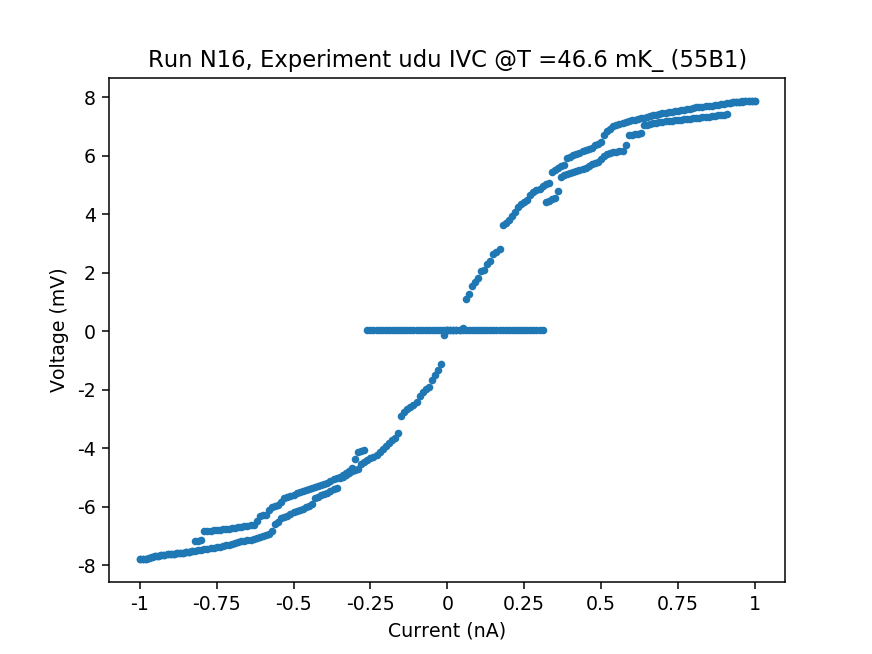

([<matplotlib.axes._subplots.AxesSubplot at 0x23f9f0a0ac8>], [None])

In [72]:
plot_by_id(16, marker = '.', ls = '')

<IPython.core.display.Javascript object>


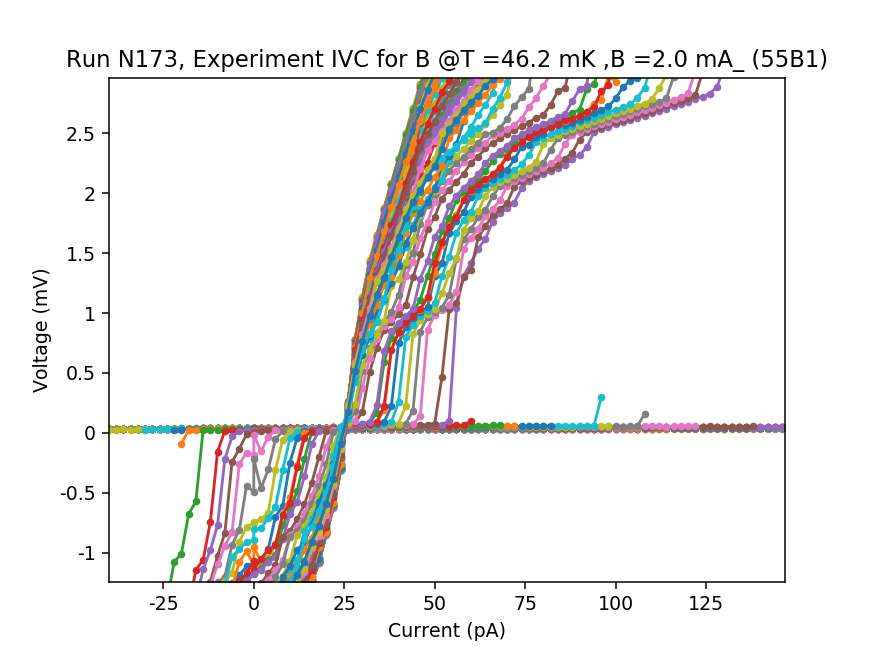

In [33]:
fig, ax = plt.subplots()

exp = exps[0]

for i in exp['ids'][:]:

    plot_by_id(i, ax, marker = '.') #, label = 'B = {:1.2f} mA'.format( exp['B'][i] /1e-3) )
    
# ax.legend()

<IPython.core.display.Javascript object>


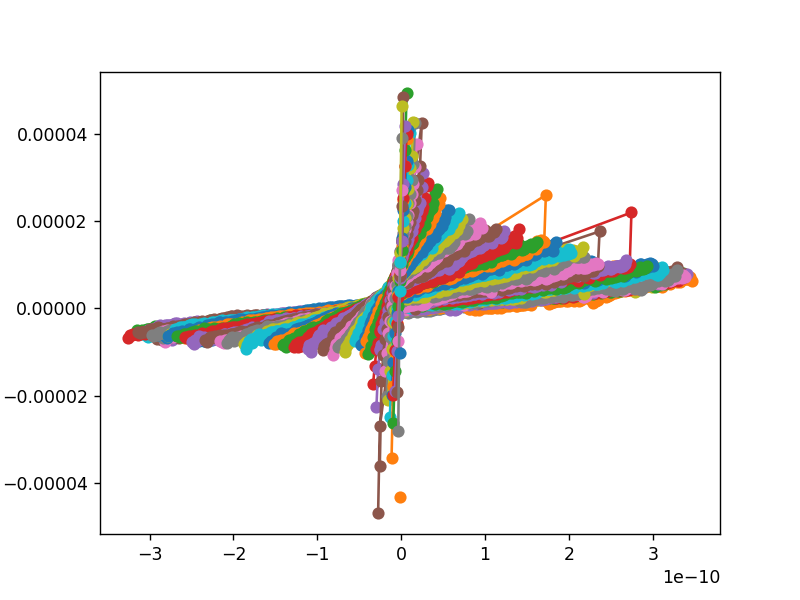

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0


<IPython.core.display.Javascript object>


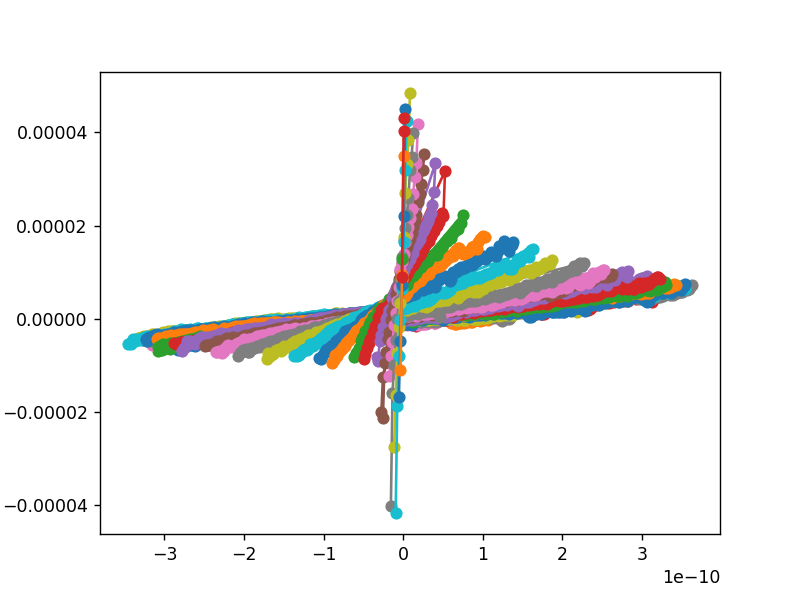

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0


<IPython.core.display.Javascript object>


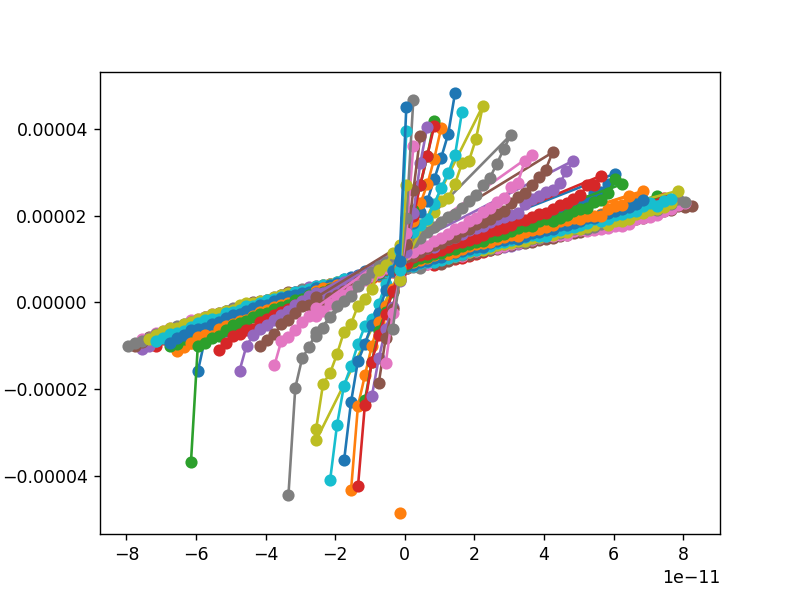

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0
e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0
e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0


<IPython.core.display.Javascript object>


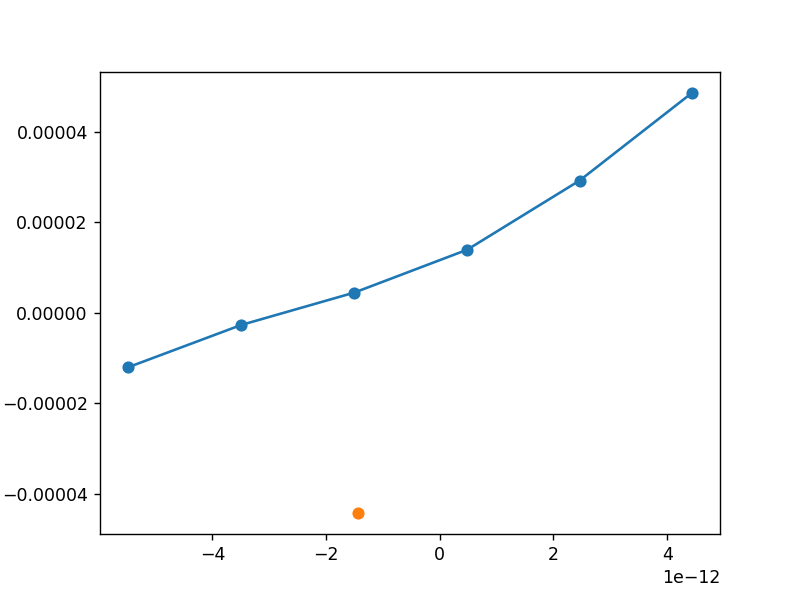

<IPython.core.display.Javascript object>


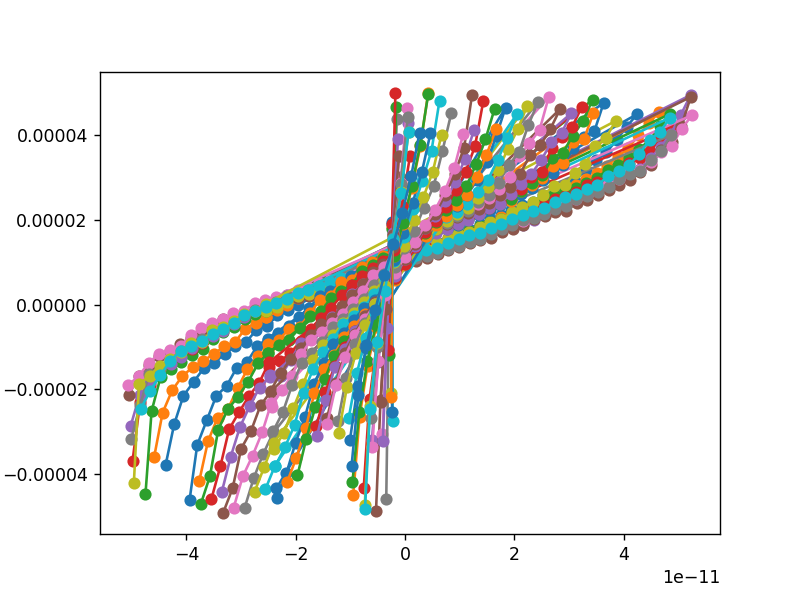

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0
e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0
e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0
e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0


<IPython.core.display.Javascript object>


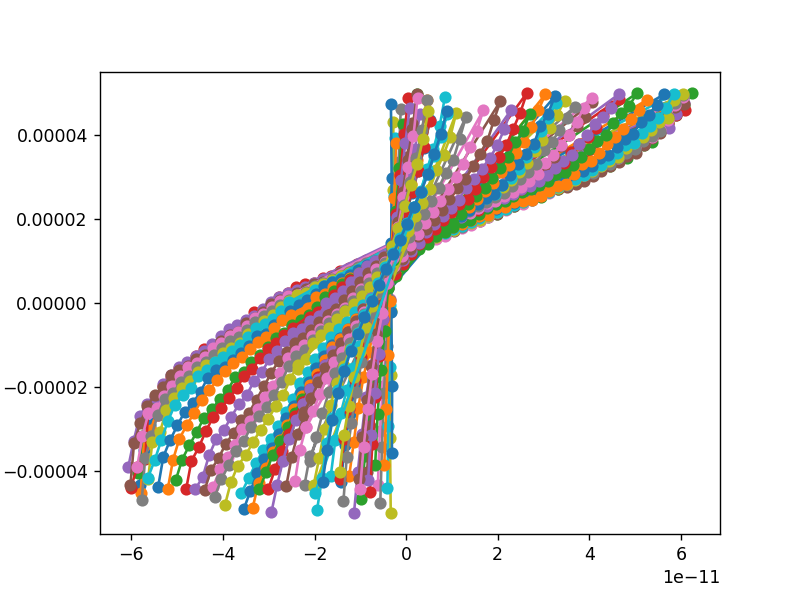

<IPython.core.display.Javascript object>


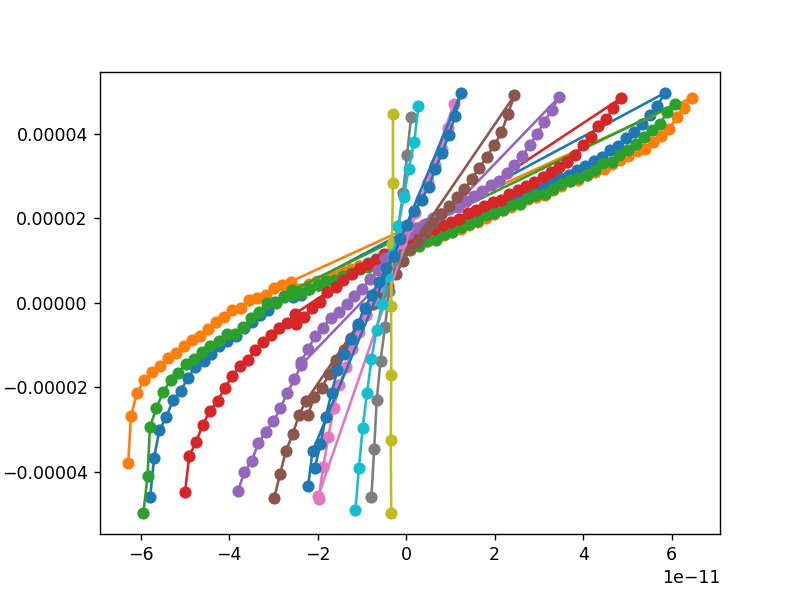

<IPython.core.display.Javascript object>


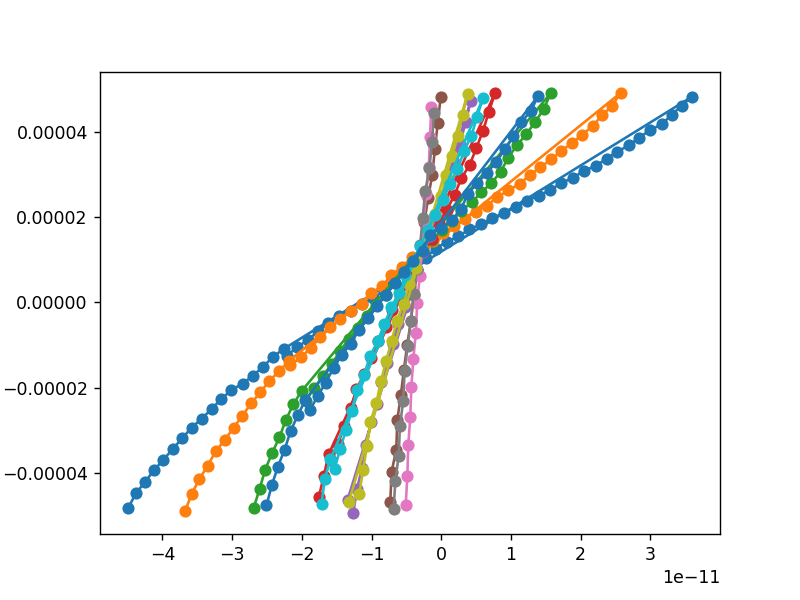

In [251]:
# exp = exps[0]

for exp in exps[:]:

    Isws = []
    R0s = []
    fig, ax = plt.subplots()
    
    Is = []
    Vs = []


    for i in exp['ids']:

        I, V = xy_by_id(i)
        
        Tb = exp['T']
        I, V = offsetRemove(I,V, offX = 25.5e-12, offY = 35e-6)

        
        I, V = cut_dxdy(I, V, dx = 1e-9 ,dy = 0.05e-3)

        I = I - Iqp(  V, T = Tb, G1 = 1/20.06e3, G2 = 1/120e3, V0 = 0.35e-3 ) 
        
        ax.plot(I,V, 'o-')

        Isw, R0 = extract_Isw_R0 (I,V)
        Isws.append(Isw)
        R0s.append(R0)

        
        Is.append(I)
        Vs.append(V)
        
    exp ['Is' ] =  Is
    exp ['Vs' ] =  Vs

        
    exp ['Isws'] =  np.array(Isws)
    exp ['R0s' ] =  np.array(R0s )
    exp ['cos' ] =  np.array( abs(np.cos(np.pi*(exp['B'] - ZF )/(2* (FF - ZF)  )) ) )
    

## Isw, R0 (cos)

<IPython.core.display.Javascript object>


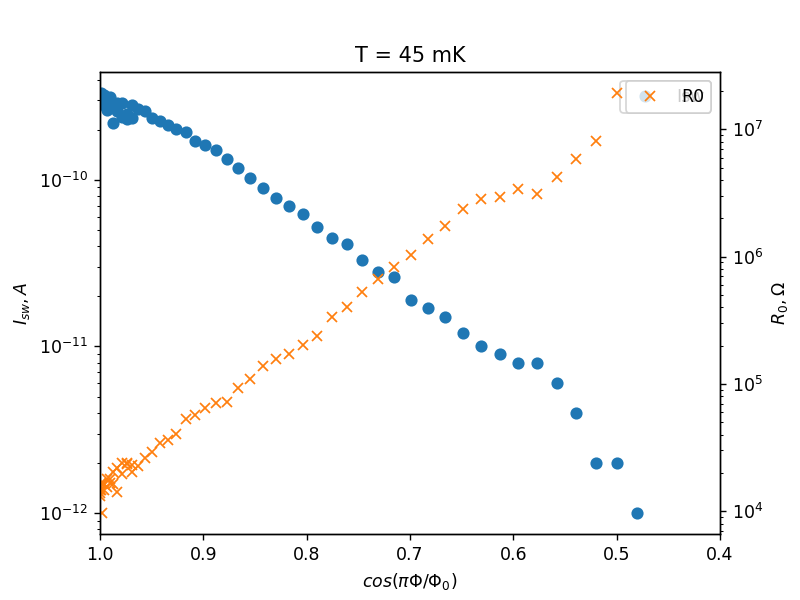

-13.604745206765125 23.22202086308288


In [263]:
fig, ax = plt.subplots()

exp = exps[0]

# cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

# cos = B_list

# R0s = np.array(R0s)

ax.plot(exp ['cos' ] , exp['Isws'], 'o', label = 'Isw')
# ax.plot(exp ['cos' ], exp['Isws']/exp ['cos' ], 'o', label = 'Isw')
ax.set_yscale('log')


ax2 = ax.twinx()
ax2.plot(exp ['cos' ], exp['R0s'], 'x', color = 'C1', label = 'R0' )
ax2.set_yscale('log')

ax.set_title('T = {:2.0f} mK'.format( exp['T']/1e-3))


# cos = np.pi*(exp['B']-.22e-3 )/2.8e-3
ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
ax.set_ylabel(r'$I_{sw}, A$')
ax2.set_ylabel(r'$R_{0}, \Omega$')

idx  = np.isfinite( exp ['cos' ] ) & np.isfinite( np.log(exp['R0s']) ) 
n, b = np.polyfit ( exp ['cos' ] [idx], np.log(          exp['R0s'][idx]  ), 1 )

# ax2.plot(exp ['cos' ] , np.exp(n*exp ['cos' ]+b) )

print(n, b)

ax.set_xlim(1,0.4)
    
ax.legend()
ax2.legend()

<IPython.core.display.Javascript object>


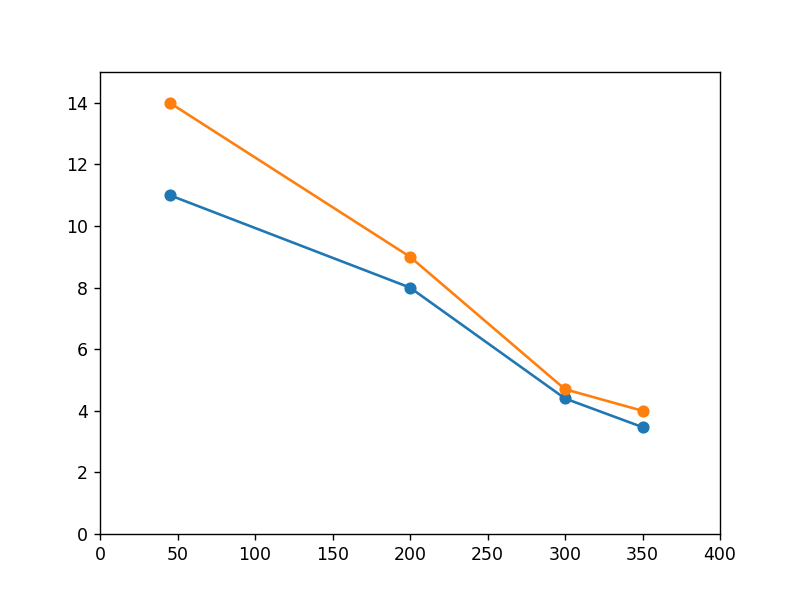

array([ -630., -1800., -1410., -1400.])

In [90]:
Ts = [45,200,300, 350]

n_Isw = np.array([11,8,4.4, 3.47])
n_R0  = np.array([-14, -9, -4.7, -4])

fig, ax = plt.subplots()
ax.plot(Ts, n_Isw,'-o')
ax.plot(Ts, -n_R0 ,'-o')

ax.set_xlim(0,400)
ax.set_ylim(0,15)

Ts*n_Isw
Ts*n_R0

In [231]:
len(exps[1]['cos'])

55

In [232]:
len(exps[1]['Vs'])

55

<IPython.core.display.Javascript object>


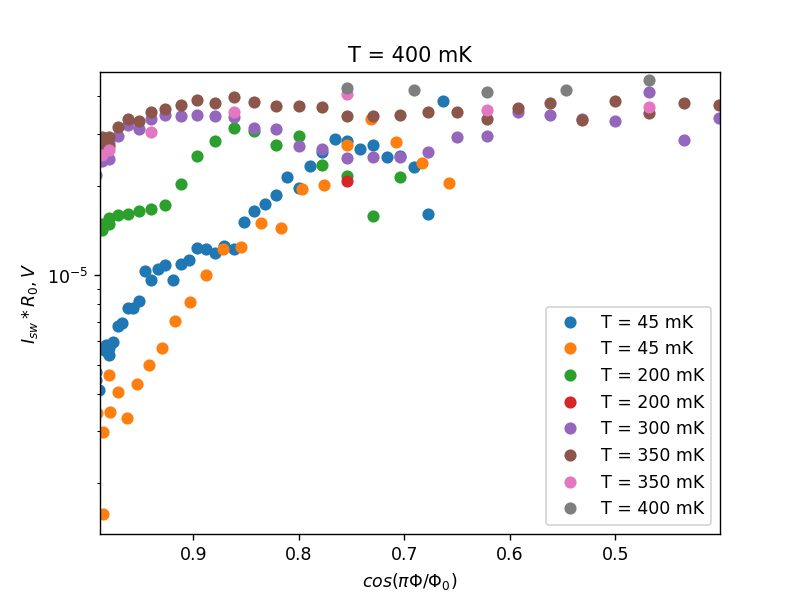

In [235]:
fig, ax = plt.subplots()

# exp = exps[10]
for  exp in exps:
    
#     cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)


    ax.plot(exp['cos'], exp['Isws'] * exp['R0s'], 'o', label = Tstr)
    ax.set_yscale('log')



    ax.set_title('T = {:2.0f} mK'.format( exp['T']/1e-3))

    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$I_{sw} * R_0, V$')


    # idx  = np.isfinite( cos) & np.isfinite( np.log(exp['Isws']) ) 
    # n, b = np.polyfit ( cos [idx], np.log(         exp['Isws'][idx]  ), 1 )

    # ax.plot(cos , np.exp(n*cos+b) )

    # print(n)

    ax.set_xlim(1,0.4)
#     ax.set_ylim(0,60e-6)

    ax.legend()
    # ax2.legend()

## Isws (cos)

<IPython.core.display.Javascript object>


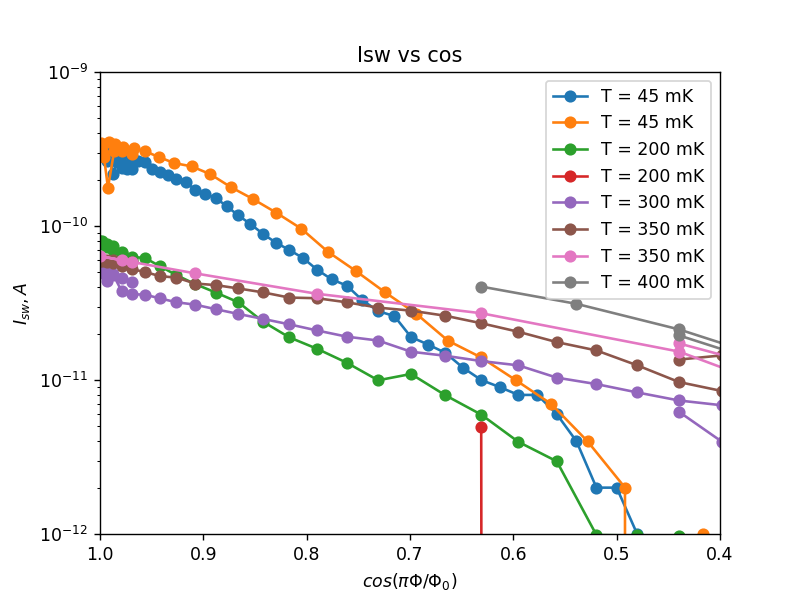

In [266]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(10)]


for i, exp in enumerate(exps[:]):

#     cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

#     cos = abs(np.pi*(exp['B']-.22e-3 )/2.8e-3) 
    
    
    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.set_title('Isw vs cos' )

#     ax.plot(cos, exp['Isws']/cos, 'o-', color = cs[i] , label = Tstr)
    ax.plot(exp['cos'], exp['Isws'], 'o-', color = cs[i] , label = Tstr)
    ax.set_yscale('log')

    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$I_{sw}, A$')
    
    ax.set_xlim(1,0.4)
    ax.set_ylim(1e-12, 1e-9)

    ax.legend()


In [242]:
exps[0]['cos']

array([0.97964907, 0.9831711 , 0.9863613 , 0.98921859, 0.991742  ,
       0.99393068, 0.99578389, 0.99730101, 0.99848152, 0.99932502,
       0.99983124, 1.        , 0.99983124, 0.99932502, 0.99848152,
       0.99730101, 0.99578389, 0.99393068, 0.991742  , 0.98921859,
       0.9863613 , 0.9831711 , 0.97964907, 0.97579638, 0.97161435,
       0.96710438, 0.962268  , 0.95710684, 0.95162263, 0.94581724,
       0.93969262, 0.93325084, 0.92649407, 0.91942459, 0.91204479,
       0.90435716, 0.8963643 , 0.88806889, 0.87947375, 0.87058177,
       0.86139596, 0.85191941, 0.84215532, 0.83210699, 0.82177782,
       0.81117127, 0.80029095, 0.78914051, 0.77772372, 0.76604444,
       0.75410661, 0.74191425, 0.72947149, 0.71678251, 0.70385161,
       0.69068315, 0.67728157, 0.6636514 , 0.64979723, 0.63572375,
       0.6214357 , 0.6069379 , 0.59223525, 0.57733272, 0.56223532,
       0.54694816, 0.53147639, 0.51582525, 0.5       , 0.484006  ,
       0.46784863, 0.45153336, 0.43506569, 0.41845117, 0.40169

## R0s (cos)

<IPython.core.display.Javascript object>


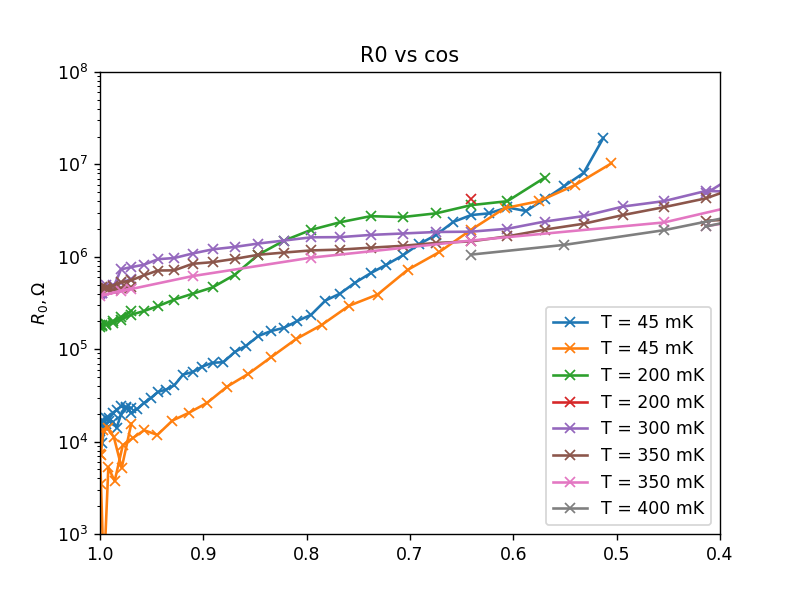

In [270]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(10)]


for i, exp in enumerate(exps):
# exp = exps[0]

    cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.plot(cos, exp['R0s'], 'x-', color =  cs[i] , label = Tstr )
    ax.set_yscale('log')

    ax.set_title('R0 vs cos' )
    ax.set_ylabel(r'$R_{0}, \Omega$')

    ax.set_xlim(1,0.4)
    ax.set_ylim(1e3,1e8)

    ax.legend()


## IVC fitting

In [206]:
R_env = 1e3

exp = exps[0]
Tb = exp['T']

I_fit = lambda x, EJ, R_env  : I_IZ( x, EJ = EJ, R = R_env, T = Tb)

<IPython.core.display.Javascript object>


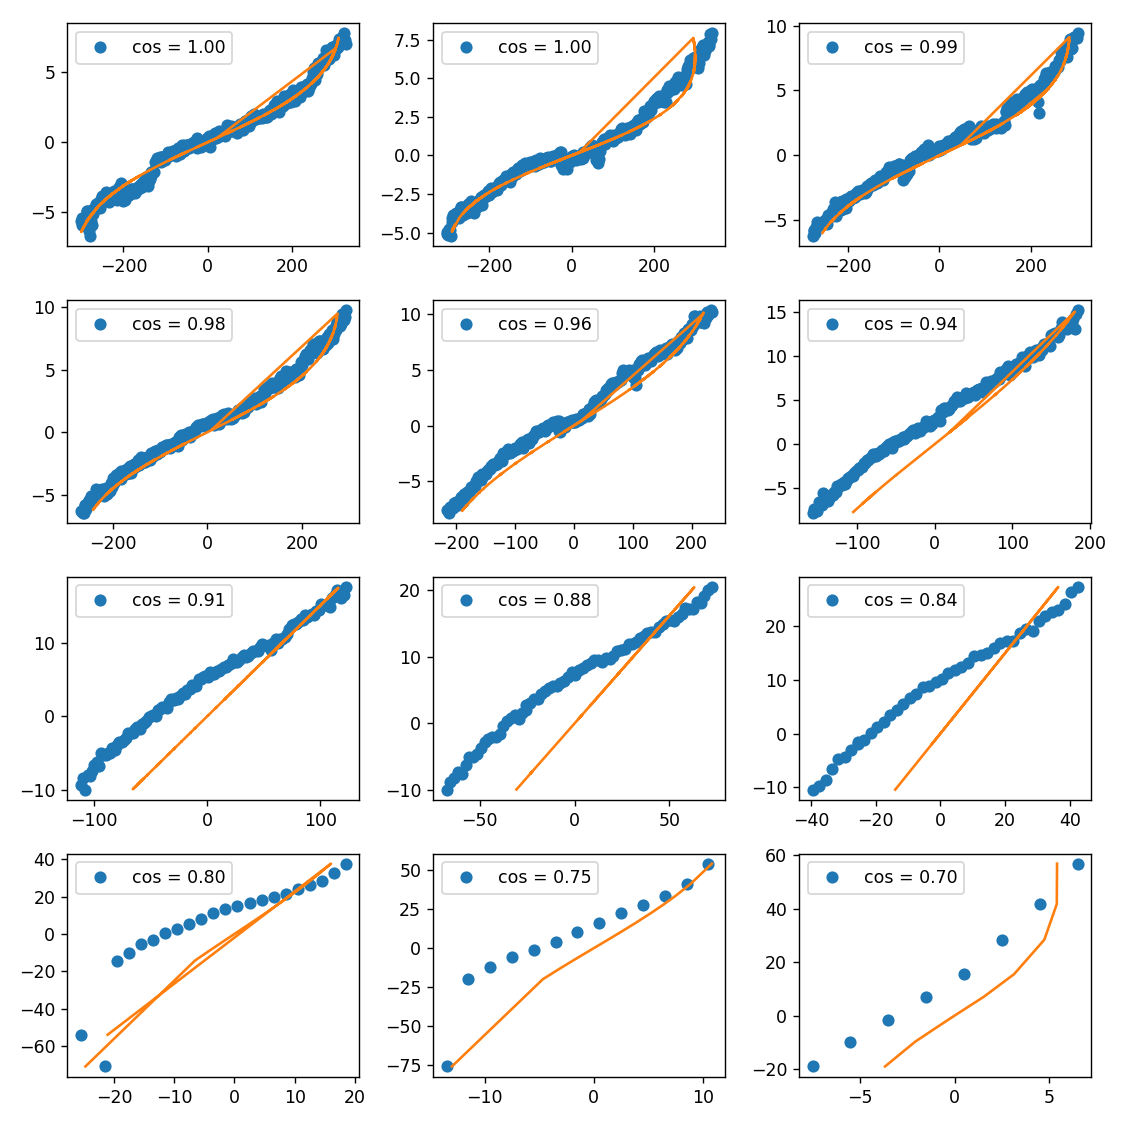

[3.79935091e-02 4.26496478e+03]
[3.70155851e-02 3.13862788e+03]
[3.59898079e-02 4.66899374e+03]
[3.54484911e-02 5.17561678e+03]
[3.31704887e-02 7.80907570e+03]
[3.34033488e-02 1.66265723e+04]
[3.40071616e-01 1.51946966e+05]
[3.56078477e-01 3.24582201e+05]
[2.83166536e-01 7.49639605e+05]
[1.10848175e-02 6.38336230e+04]
[7.86127365e-03 6.26718190e+04]
[4.84366614e-03 2.59483924e+04]


In [207]:
R_env = 1e3
Cj = 1.5e-15


EJ0= .04




fig = plt.figure(figsize = (9,9))
gs = GridSpec.GridSpec(4, 3)

for i in range(12):
# for i, j in enumerate([0,3,4,5,6,7,8, 11, 12, 14,15,16]):
    
    ax = fig.add_subplot(gs[i] )
    
    j = 4*i+10
    cos = exp['cos'][j]
    ax.plot(exp['Is'][j] / 1e-12, exp['Vs'][j] / 1e-6, 'o' ,label = 'cos = {:1.2f}'.format(cos))

#     ax.set_xlim(-300, 300)
#     ax.set_ylim(-30, 0)

    EJ = EJ0*cos**2 ###*np.exp(  cos - 1 )
    
    Ic0 = EJ/ (Φ0/2/pi/kB)
    Vc0 = R_env*Ic0
#     Vs = np.linspace(-Vc0*0.5, Vc0*0.5, 101)
#     Vs = np.linspace(-100e-6, 100e-6, 101)
    Vs =exp['Vs'][j]
#     Is = I_IZ( Vs, EJ = EJ0, R = R_env, T = Tb) 
    
    popt1 = ( 0.025, 1e3)
    

    popt, pcov = curve_fit(I_fit, exp['Vs'][j],exp['Is'][j], p0 = popt1 )
    Is = I_fit( Vs, *popt)

    print(popt)
    
    ax.plot(Is / 1e-12,  (Vs - Is*R_env) / 1e-6 , '-')

# #     Rd = find_exp_R0(I,V)
#     ax.plot( Vs/ exp['R0s'][j] /1e-12,Vs/1e-6)
    
# #     print(Rd)
    
#     plt.title('T = {:2.0f} mK'.format(Tb/1e-3))
    ax.legend()
    
    plt.tight_layout()

In [195]:
exp = exps[1]

EJs = []
Renvs =[]

for i, cos in enumerate(exp['cos']):
    
    popt1 = ( 0.025, 1e3)
    popt, pcov = curve_fit(I_fit, exp['Vs'][i],exp['Is'][i], p0 = popt1 )

    EJ, Renv = popt
    
    EJs.append(EJ)
    Renvs.append(Renv)
    
    print(popt)
    
    


[3.61565448e-02 4.07220855e+03]
[3.75798931e-02 4.01931722e+03]
[3.61706084e-02 3.60882121e+03]
[3.85707976e-02 3.24991965e+03]
[3.71211877e-02 4.68133338e+03]
[3.82220124e-02 3.76348375e+03]
[3.83927144e-02 3.84282293e+03]
[4.19884233e-02 3.96059862e+03]
[3.84579129e-01 1.19787201e+04]
[3.97769507e-02 3.49071323e+03]
[3.94012789e-02 3.18663890e+03]
[3.74187618e-02 3.58115532e+03]
[3.78297336e-02 4.00989834e+03]
[3.66466670e-02 4.10955296e+03]
[3.36233583e-02 3.93137588e+03]
[3.28960053e-02 4.90789327e+03]
[3.22946057e-02 4.94206490e+03]
[3.14290545e-02 6.89130897e+03]
[3.15684386e-02 1.14246260e+04]
[4.17648905e-02 2.85596426e+04]
[3.93889423e-01 1.32943490e+05]
[3.64482279e-01 2.01488941e+05]
[3.22664270e-01 3.43258547e+05]
[2.74274699e-01 5.56342477e+05]
[2.90539250e-01 8.37320162e+05]
[1.24022756e-02 4.81092458e+04]
[1.00654386e-02 5.58904788e+04]
[9.49087672e-03 7.10300587e+04]
[5.60302625e-03 2.54464313e+04]
[6.14905732e-03 9.87401727e+02]
[5.36634914e-03 7.31645785e+04]
[-5.0039

D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[-1.93655581e-09  6.93527303e+03]
[-8.19769533e-08  7.78395181e+03]


TypeError: Improper input: N=2 must not exceed M=1

<IPython.core.display.Javascript object>


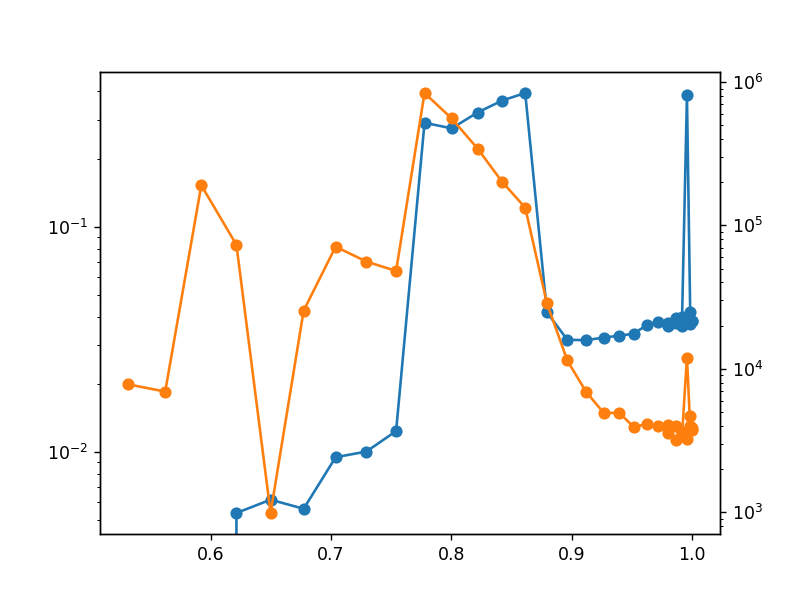

In [202]:
fig, ax = plt.subplots()

ax.plot(exp['cos'][:34], EJs ,  'o-', c = 'C0')
ax2 = ax.twinx()   

ax2.plot(exp['cos'][:34], Renvs , 'o-', c = 'C1' )

ax.set_yscale('log')
ax2.set_yscale('log')

# 68N5

<IPython.core.display.Javascript object>


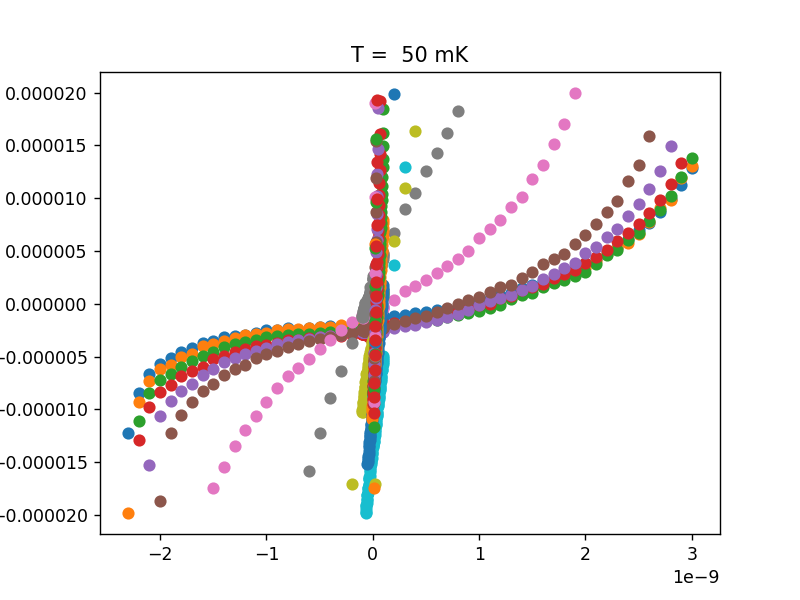

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:223: RankWarning: Polyfit may be poorly conditioned
  return Isw, R0


<IPython.core.display.Javascript object>


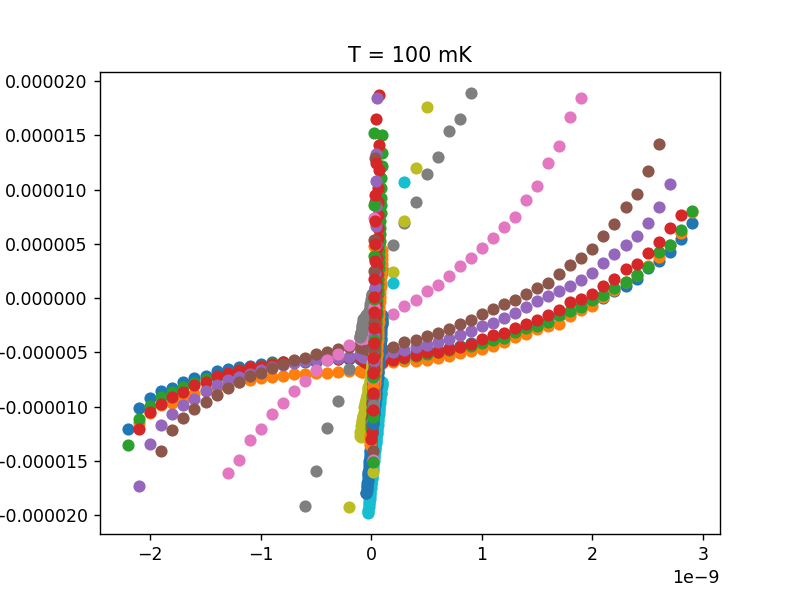

<IPython.core.display.Javascript object>


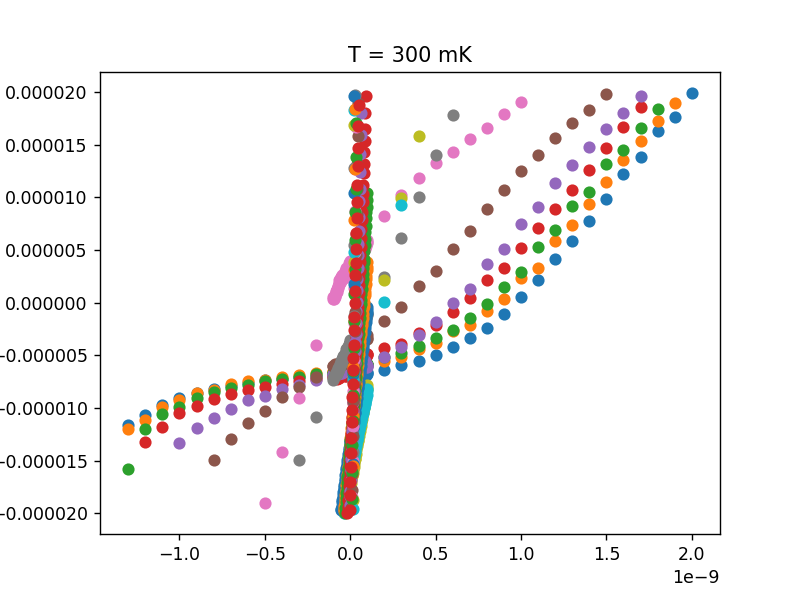

<IPython.core.display.Javascript object>


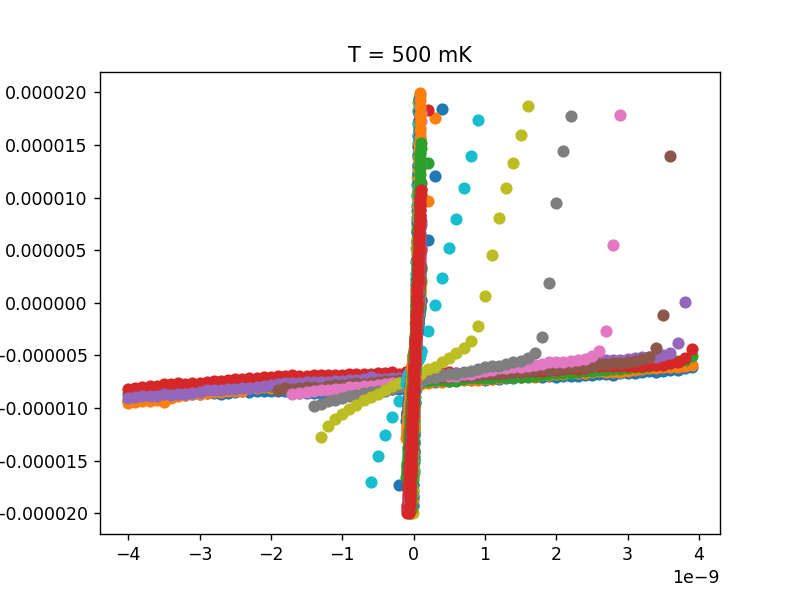

In [156]:
fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\'

Frust = 'IV scanB'
spl = 'chain 68N5\\' + Frust + '\\'

fs = os.listdir(fdir + spl)

exps = []

for f in fs:
    exps.append(  load_exp_B(file = fdir + spl + f, ZF = 0, FF = 8.85e-4, VERBOSE = True )   ) 


In [145]:
def f(x):
    
    if x == 0:
        return 1
    
    print('fda')
    return x**2

1

## Isw, R0 (cos)

<IPython.core.display.Javascript object>


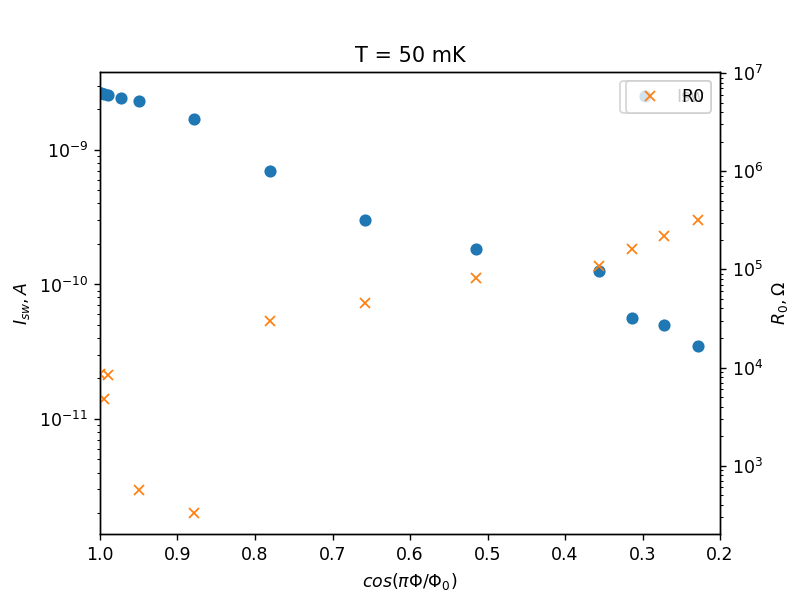

-7.2427320794530505 14.91768756455931


In [157]:
fig, ax = plt.subplots()

exp = exps[0]


ax.plot(exp ['cos' ] , exp['Isws'], 'o', label = 'Isw')
# ax.plot(exp ['cos' ], exp['Isws']/exp ['cos' ], 'o', label = 'Isw')
ax.set_yscale('log')


ax2 = ax.twinx()
ax2.plot(exp ['cos' ], exp['R0s'], 'x', color = 'C1', label = 'R0' )
ax2.set_yscale('log')

ax.set_title('T = {:2.0f} mK'.format( exp['T']/1e-3))



ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
ax.set_ylabel(r'$I_{sw}, A$')
ax2.set_ylabel(r'$R_{0}, \Omega$')

idx  = np.isfinite( exp ['cos' ] ) & np.isfinite( np.log(exp['R0s']) ) 
n, b = np.polyfit ( exp ['cos' ] [idx], np.log(          exp['R0s'][idx]  ), 1 )

# ax2.plot(exp ['cos' ] , np.exp(n*exp ['cos' ]+b) )

print(n, b)

ax.set_xlim(1,0.2)
    
ax.legend()
ax2.legend()

<IPython.core.display.Javascript object>


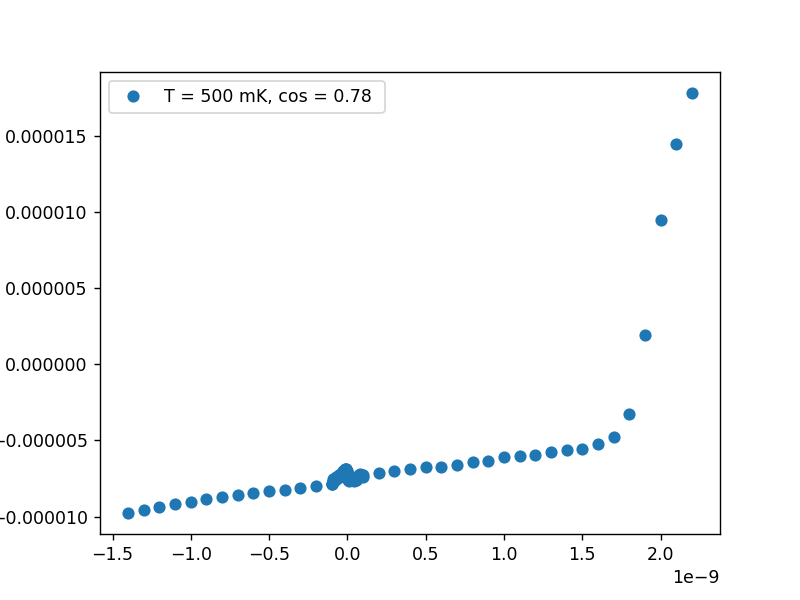

array([  3850.38705606,             nan,             nan,             nan,
          682.45134746,   1099.49005213,   4604.73030349,             nan,
         4625.22155371,  12897.94764332,  55244.48943463,  69947.11363941,
       105643.45067873, 137380.71191931, 166425.9463341 , 225336.8511597 ,
       306589.25861437, 407870.14700855, 504795.58646617, 517826.95488722,
       448837.99901186, 333920.5141129 , 250599.14989552, 182375.89556136])

In [161]:
plot_by_key(exp = exps[3], key = 'cos', val = .78)

exps[3]['R0s']

## Isws (cos)

<IPython.core.display.Javascript object>


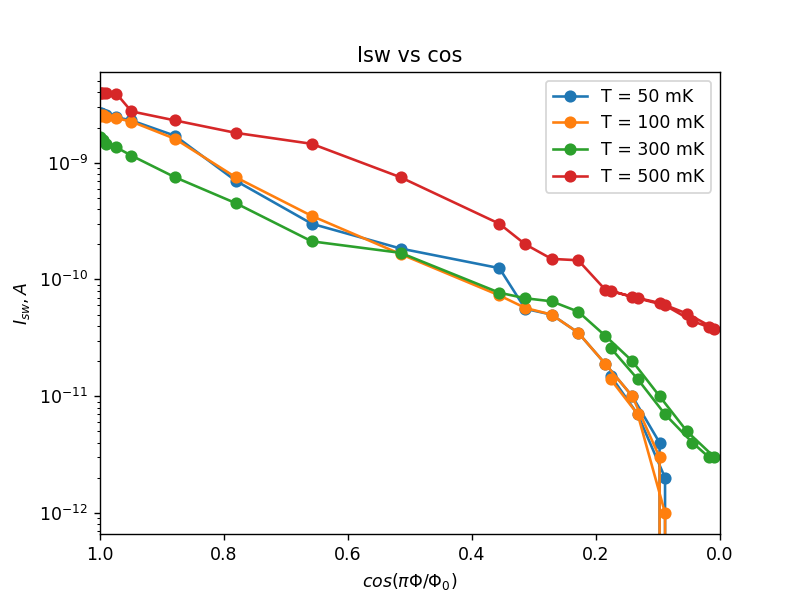

In [158]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(10)]


for i, exp in enumerate(exps):

    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.set_title('Isw vs cos' )

    ax.plot(exp['cos'], exp['Isws'], 'o-', color = cs[i] , label = Tstr)
    ax.set_yscale('log')

    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$I_{sw}, A$')
    
    ax.set_xlim(1,0.0)

    ax.legend()


## R0s (cos)

<IPython.core.display.Javascript object>


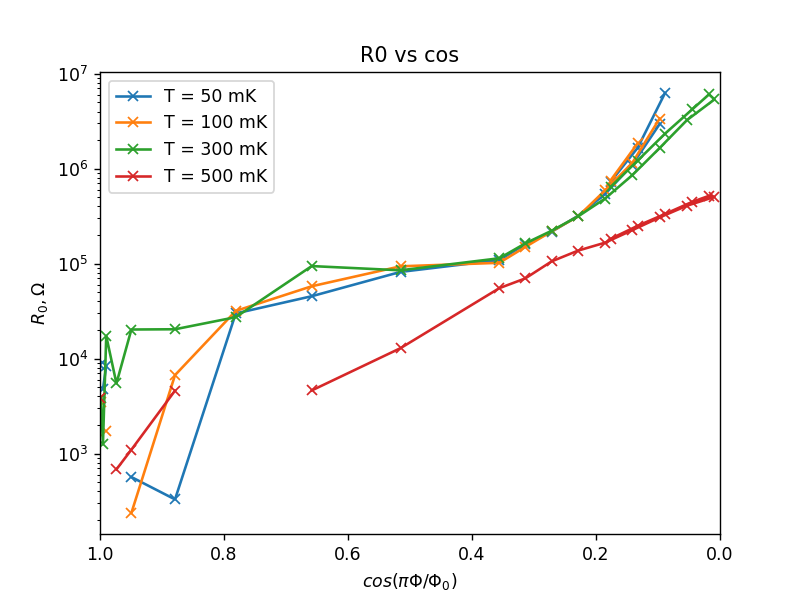

In [159]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(10)]


for i, exp in enumerate(exps):


    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.plot(exp['cos'], exp['R0s'], 'x-', color =  cs[i] , label = Tstr )
    ax.set_yscale('log')

    ax.set_title('R0 vs cos' )
    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$R_{0}, \Omega$')

    ax.set_xlim(1,0.0)
    ax.legend()


# 70B1N7

In [6]:
SAMPLE = '70B1N7'

qc.config["core"]["db_location"] = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)


In [7]:
len(np.linspace(ZF, ZF + 1.1*dF, 101)[:-16])

NameError: name 'ZF' is not defined

## List of exp

**list of run_ids*
#105-206: IVC for T=45mK, B_list = np.linspace(ZF, ZF + 1.1*dF, 101), Vthr = 6mV
#208-292: BT = 50mK, Blist = np.linspace(0,2e-3,101)[:-20] 


<IPython.core.display.Javascript object>


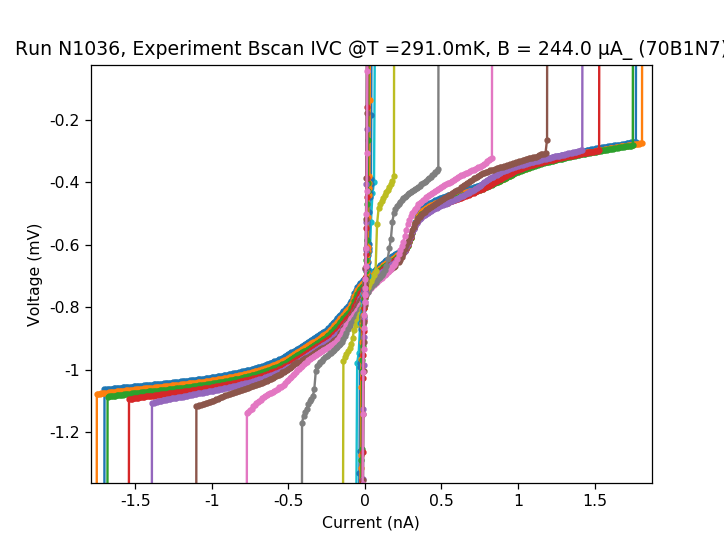

In [28]:
fig, ax = plt.subplots()
exp = exps[-1]
for cos in exp['cos'][::3]:
    ind = load_by_key(exp, 'cos', cos )
    
    plot_by_id(exp['ids'][ind], ax, marker = '.', ls ='-')
#     plot_by_key(exp, 'cos', cos, ax, ls = '')

In [8]:
ZF =  0.004e-3
FF =  0.224e-3


dF = 0.250e-3
midF = 0.154e-3


keys  = ['ids',                  'T',          'B',                      'Vthr']



valss = [[range(105, 205+1),         45e-3,       np.linspace(ZF, ZF + 1.1*dF, 101),            4e-3],
#          [range(208, 292+1),         50e-3,   np.linspace(ZF, ZF + 1.1*dF, 101)[:-16],      4e-3],
         [range(295, 345+1),         70e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            4e-3],
         [range(346, 396+1),         90e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            4e-3],
#          [range(397, 447+1),        110e-3,   np.linspace(ZF, ZF + 1.0*dF, 51) ,            4e-3],
         [range(450, 500+1),        110e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            4e-3],
         [range(501, 551+1),        130e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            4e-3],
         [range(552, 602+1),        150e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            4e-3],
         [range(603, 653+1),        170e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3],
         [range(654, 704+1),        190e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3],
         [range(705, 755+1),        210e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3],
         [range(758, 808+1),        230e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3],
         [range(809, 859+1),        250e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3],
         [range(860, 910+1),        270e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3],
         [range(918, 968+1),        290e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3]
#          [range(988, 1038+1),       290e-3,       np.linspace(ZF, ZF + 1.0*dF, 51) ,            3e-3]
         
#           [range(306,356+1),     300e-3,  np.linspace(0e-3, 2e-3, 51),    4e-3],
#          [range(360,410+1),     350e-3,  np.linspace(0e-3, 2e-3, 51),    4e-3],
#          [range(411,421+1),     350e-3,  np.linspace(0e-3, 2e-3, 11),    8e-3],
#          [range(422,432+1),     400e-3,  np.linspace(1e-3, 2e-3, 11),    8e-3]
        ]  
        


    
exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

populate_exps (exps, VERBOSE = False)

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Isw, R0 (cos)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


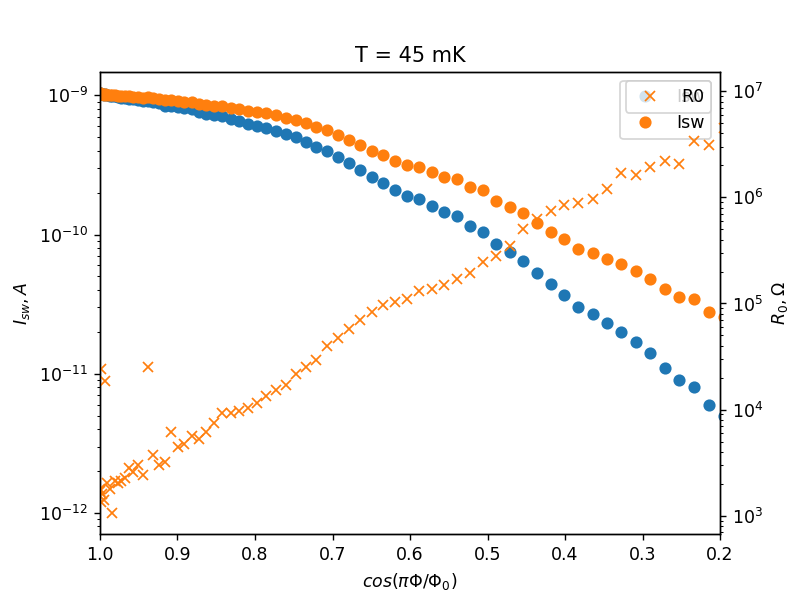

-9.535907346185825 17.209694511843736


In [689]:
fig, ax = plt.subplots()

exp = exps[1]

# cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

# cos = B_list

# R0s = np.array(R0s)

ax.plot(exp ['cos' ] , exp['Isws'], 'o', label = 'Isw')


# ax.plot(exp ['B' ] , exp['Isws'], 'o', label = 'Isw')

ax.plot(exp ['cos' ], exp['Isws']/exp ['cos' ], 'o', label = 'Isw')
ax.set_yscale('log')


ax2 = ax.twinx()
ax2.plot(exp ['cos' ], exp['R0s'], 'x', color = 'C1', label = 'R0' )
ax2.set_yscale('log')

ax.set_title('T = {:2.0f} mK'.format( exp['T']/1e-3))


# cos = np.pi*(exp['B']-.22e-3 )/2.8e-3
ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
ax.set_ylabel(r'$I_{sw}, A$')
ax2.set_ylabel(r'$R_{0}, \Omega$')

idx  = np.isfinite( exp ['cos' ] ) & np.isfinite( np.log(exp['R0s']) ) 
n, b = np.polyfit ( exp ['cos' ] [idx], np.log(          exp['R0s'][idx]  ), 1 )

# ax2.plot(exp ['cos' ] , np.exp(n*exp ['cos' ]+b) )

print(n, b)



ax.set_xlim(1,0.2)
# ax.set_xscale('log')
    
ax.legend()
ax2.legend()

<IPython.core.display.Javascript object>


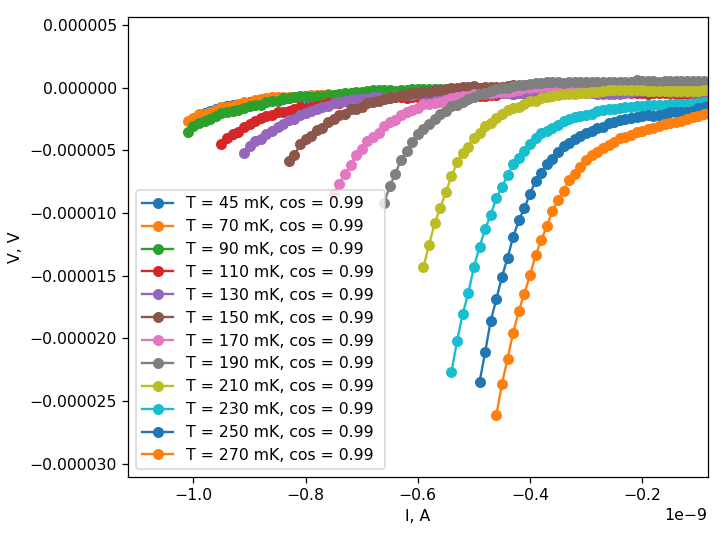

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('I, A')
ax.set_ylabel('V, V')

cos = 0.99
for exp in exps[:-1]:
    I, V = plot_by_key(exp, 'cos', cos, ax, ls = '-')
    ind = load_by_key(exp, 'cos', cos)

#     plot_by_id(exp['ids'][ind], ax, marker = '.')
#     ax.plot(abs(I + 100e-12), abs(V), '.')

#     ax.plot(-abs(I + 0e-12), -abs(V), '.')

plt.tight_layout()

## Isws (cos)

<IPython.core.display.Javascript object>


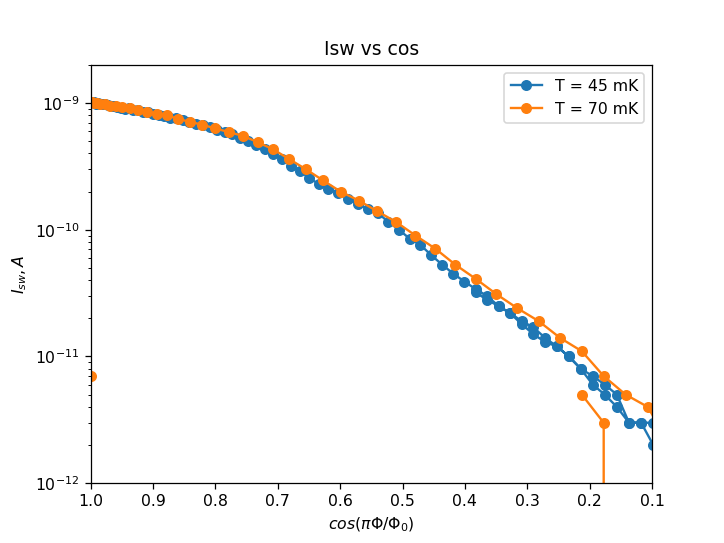

In [203]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(15)]


for i, exp in enumerate(exps[:2]):

#     cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

#     cos = abs(np.pi*(exp['B']-.22e-3 )/2.8e-3) 
    
    
    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.set_title('Isw vs cos' )

#     ax.plot(exp['cos'], exp['Isws']/exp['cos']**1, 'o-', color = cs[i] , label = Tstr)
    ax.plot(exp['cos'], exp['Isws'], 'o-', color = cs[i] , label = Tstr)
    ax.set_yscale('log')

    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$I_{sw}, A$')
    
    ax.set_xlim(1,0.1)
    ax.set_ylim(1e-12, 2e-9)

    ax.legend()

    
# ax.set_xscale('log')

D:\anaconda\lib\site-packages\qcodes\dataset\plotting.py:199: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


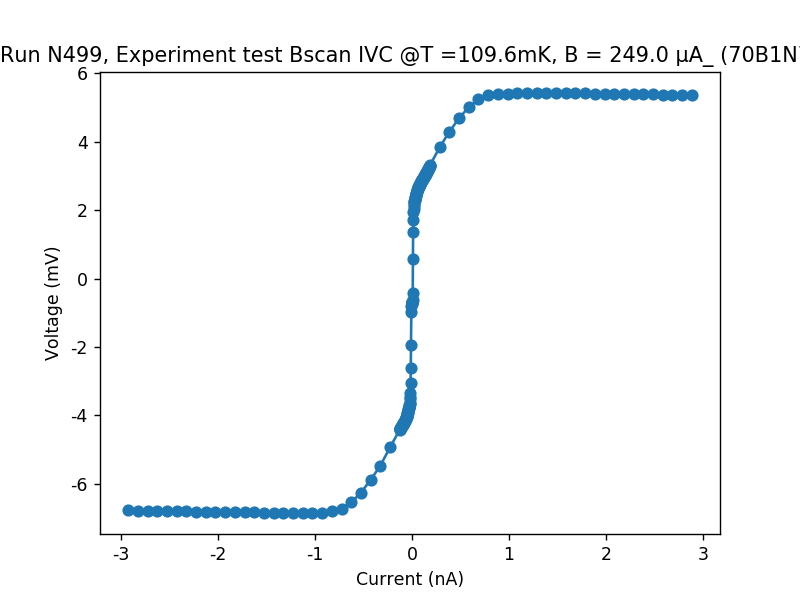

([<matplotlib.axes._subplots.AxesSubplot at 0x236dbc84128>], [None])

In [709]:
exps[-1]['ids']
plot_by_id(499, marker = 'o')
# plot_by_key(exp, 'cos', 0.3827 )

## R0s (cos)

<IPython.core.display.Javascript object>


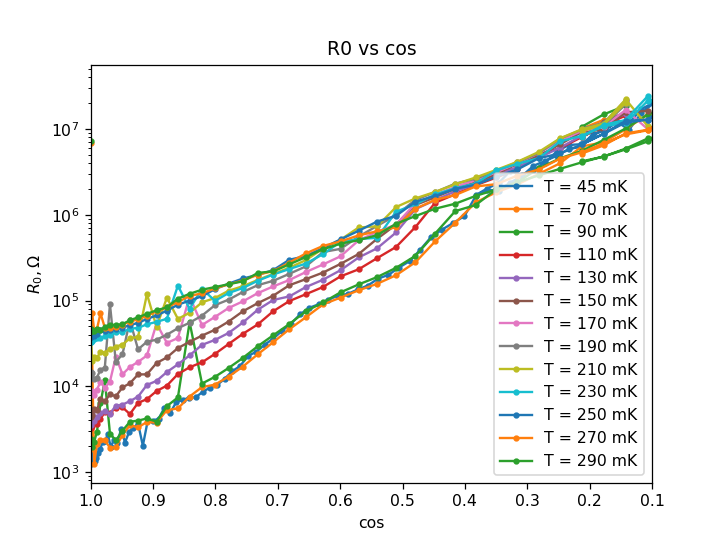

Text(0.5, 0, 'cos')

In [106]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(15)]


for i, exp in enumerate(exps):

    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.plot(exp['cos'], exp['R0s'], '.-', color =  cs[i] , label = Tstr )
    ax.set_yscale('log')

    ax.set_title('R0 vs cos' )
    ax.set_ylabel(r'$R_{0}, \Omega$')

    ax.set_xlim(1,0.1)
#     ax.set_ylim(1e3,1e8)

    ax.legend()
ax.set_xlabel('cos')


## IVC fitting

### right

In [128]:
# fig, ax = plt.subplots()

ax = axs[0][0]

cs = [f'C{i}' for i in range(15)]

As = []
Bs = []
Ts = []

R_env = 1e2

for i, exp in enumerate(exps[:]):
#     I, V = plot_by_key(exp, 'cos', 0.99 , ax, marker = '.', color = cs[i])
    
    ind = load_by_key(exp, 'cos', 0.99)
    
    I, V = exp['Irs'][ind], exp['Vrs'][ind]
    ax.plot(I/1e-9, V/1e-6, '.')
    
    Tb = exp['T']
    Isw = np.max(abs(I))/1e-9
    
    
#     V_fit = lambda x, EJ0, Tn  : 1e6*V_KM( x*1e-12 , EJ = EJ0, Ec = .2, Q = 30, T = Tn)
#     popt1 = ( .7 , .05)
#     popt, pcov = curve_fit(V_fit, I/1e-12 ,V/1e-6, p0 = popt1 )

#     V_fit = lambda x, EJ0,  Tn  : 1e6* V_AH_star( x*1e-12,  EJ= EJ0, Rn = R_env,  T = Tn)
#     popt1 = ( 0.05 , 1e5) 
#     V_fit = lambda x, A  : A*np.sinh(x*1.2e-3/Tb)
#     popt1 = ( 1e-3 )


    V_fit = lambda x, A,B  : A*np.sinh(x*B)
    popt1 = ( 1e-3 , 1e-2 )
    popt, pcov = curve_fit(V_fit, I/1e-12 , V/1e-6, p0 = popt1 )
    
    
#     popt =  popt1
    
#     popt = ( 0.005, 0.5)

#     popt[1] =  Φ0/kB*1e-12 / .02 

    Vs = V_fit(I/1e-12, *popt)*1e-6

    ax.plot(I/1e-9, Vs/1e-6 , color = cs[i])

    print(popt)
    
    As.append(popt[0])
    Bs.append(popt[1])
    Ts.append(Tb)


[0.00757251 0.00728069]
[0.00891058 0.00714408]
[0.05586948 0.00563482]
[0.06184234 0.00609671]
[0.0767187  0.00642287]
[0.28507302 0.00571628]
[0.61009479 0.00549721]
[1.45985069 0.00496648]
[2.34878789 0.00479354]
[5.99268305e+00 3.34673650e-03]
[4.77600594e+00 4.31644770e-03]
[5.07141858e+00 4.45142185e-03]
[4.77732462e+00 4.66204011e-03]


In [129]:
As = np.array(As)
Bs = np.array(Bs)
Ts = np.array(Ts)


# fig, ax = plt.subplots()
ax = axs[1][0]

ax.plot(Ts, As, 'o-')
# ax.set_ylim(0, 1.5)
ax2 = ax.twinx()

# ax2.plot(Ts, Φ0/Bs/kB*1e-12, 'x--', c = 'C1')
ax2.plot(Ts, Bs, 'x--', c = 'C1')

# ax2.set_ylim(0, 1)

# ax.set_xlim(1, 0.2)

# ax.set_yscale('log')

### left

In [130]:
# fig, ax = plt.subplots()

ax = axs[0][1]

cs = [f'C{i}' for i in range(15)]

As = []
Bs = []
Ts = []

R_env = 1e2

for i, exp in enumerate(exps[:]):
#     I, V = plot_by_key(exp, 'cos', 0.99 , ax, marker = '.', color = cs[i])
    
    ind = load_by_key(exp, 'cos', 0.99)
    
    I, V = exp['Ils'][ind], exp['Vls'][ind]
    ax.plot(I/1e-9, V/1e-6, '.')
    
    Tb = exp['T']
    Isw = np.max(abs(I))/1e-9
    
    
#     V_fit = lambda x, EJ0, Tn  : 1e6*V_KM( x*1e-12 , EJ = EJ0, Ec = .2, Q = 30, T = Tn)
#     popt1 = ( .7 , .05)
#     popt, pcov = curve_fit(V_fit, I/1e-12 ,V/1e-6, p0 = popt1 )

#     V_fit = lambda x, EJ0,  Tn  : 1e6* V_AH_star( x*1e-12,  EJ= EJ0, Rn = R_env,  T = Tn)
#     popt1 = ( 0.05 , 1e5) 
#     V_fit = lambda x, A  : A*np.sinh(x*1.2e-3/Tb)
#     popt1 = ( 1e-3 )


    V_fit = lambda x, A,B  : A*np.sinh(x*B)
    popt1 = ( 1e-3 , 1e-2 )
    popt, pcov = curve_fit(V_fit, I/1e-12 , V/1e-6, p0 = popt1 )
    
    
#     popt =  popt1
    
#     popt = ( 0.005, 0.5)

#     popt[1] =  Φ0/kB*1e-12 / .02 

    Vs = V_fit(I/1e-12, *popt)*1e-6

    ax.plot(I/1e-9, Vs/1e-6 , color = cs[i])

    print(popt)
    
    As.append(popt[0])
    Bs.append(popt[1])
    Ts.append(Tb)


[0.17922071 0.00293091]
[0.07462187 0.00396337]
[0.0039272  0.00737035]
[0.08260807 0.00474083]
[0.0141481  0.00717972]
[0.00097597 0.01133768]
[0.00373277 0.01124618]
[0.00053574 0.0158537 ]
[0.00905915 0.01365212]
[0.14097264 0.01064159]
[0.39458653 0.00965312]
[1.02907846 0.00845291]
[0.95335079 0.00884774]


In [131]:
As = np.array(As)
Bs = np.array(Bs)
Ts = np.array(Ts)


# fig, ax = plt.subplots()
ax = axs[1][1]


ax.plot(Ts, As, 'o-')
# ax.set_ylim(0, 1.5)
ax2 = ax.twinx()

# ax2.plot(Ts, Φ0/Bs/kB*1e-12, 'x--', c = 'C1')
ax2.plot(Ts, Bs, 'x--', c = 'C1')

# ax2.set_ylim(0, 1)

# ax.set_xlim(1, 0.2)

# ax.set_yscale('log')

<IPython.core.display.Javascript object>


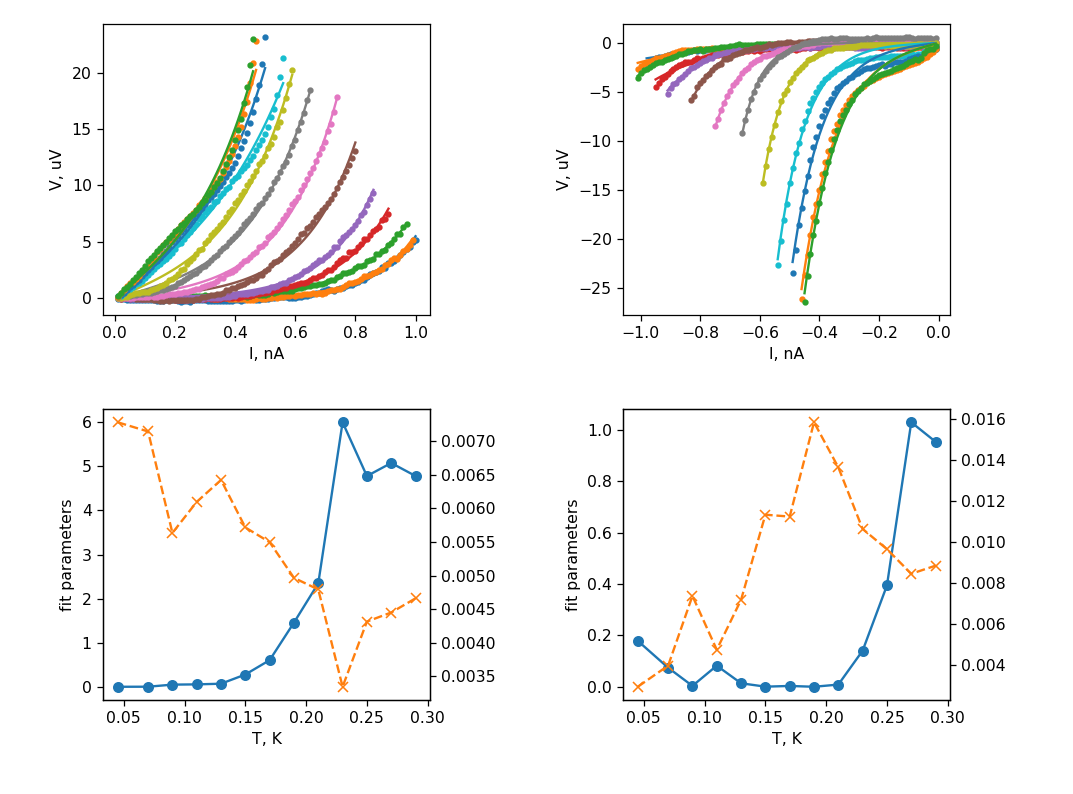

In [127]:
fig, axs = plt.subplots(2,2)

plt.tight_layout()

for i in [0,1]:
    axs[0][i].set_xlabel('I, nA')
    axs[0][i].set_ylabel('V, uV')

    axs[1][i].set_xlabel('T, K')
    axs[1][i].set_ylabel('fit parameters')

In [132]:

plt.tight_layout()

## Symmetry

In [22]:
ZF =  0.004e-3
FF =  0.224e-3


keys  = [    'ids',          'pin',      'src', 'B', 'T']



valss = [
    

   [np.arange(972,973+1),   '3ba,4ab',  '3252', np.array([ZF,FF]), 40e-3] ,
   [np.arange(974,975+1),   '3ab,4ba',  '3252', np.array([ZF,FF]), 40e-3] ,
   [np.arange(976,977+1),   '3ba,4ba',  '3252', np.array([ZF,FF]), 40e-3] 
#    [np.arange(978,979+1),   '3ba,4ab',  '5204', np.array([ZF,FF])],
#    [np.arange(980,981+1),   '3ab,4ba',  '5204', np.array([ZF,FF])],
#    [np.arange(982,983+1),   '3ba,4ba',  '5204', np.array([ZF,FF])]
    
        ]  
        


    
exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]


populate_exps (exps, VERBOSE = False)




<IPython.core.display.Javascript object>


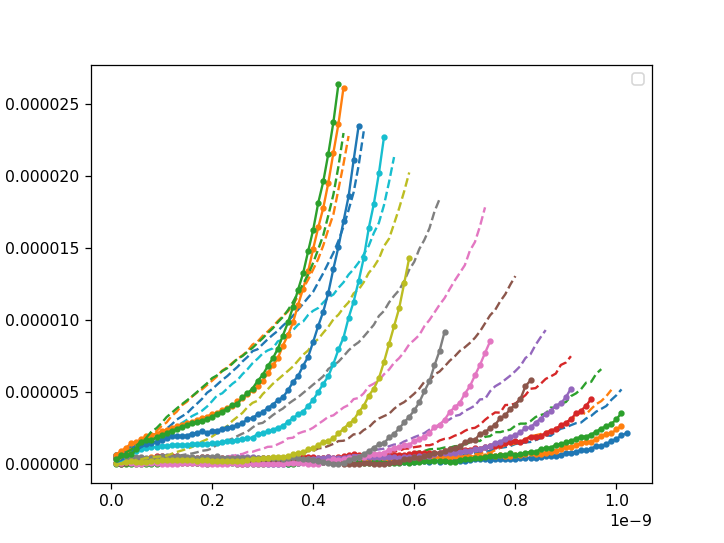

No handles with labels found to put in legend.


In [210]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(15)]

for i, exp in enumerate(exps):
    
#     ind = exp['ids'][load_by_key(exp, 'cos', 0.99)]
    
    I, V = exp['Ils'][ind], exp['Vls'][ind]
    ax.plot(abs(I), abs(V), '.-', c = cs[i])
    
    I, V = exp['Irs'][ind], exp['Vrs'][ind]
    k=1
    ax.plot(abs(I), abs(V)*k, '--', c = cs[i])
    
ax.legend()

<IPython.core.display.Javascript object>


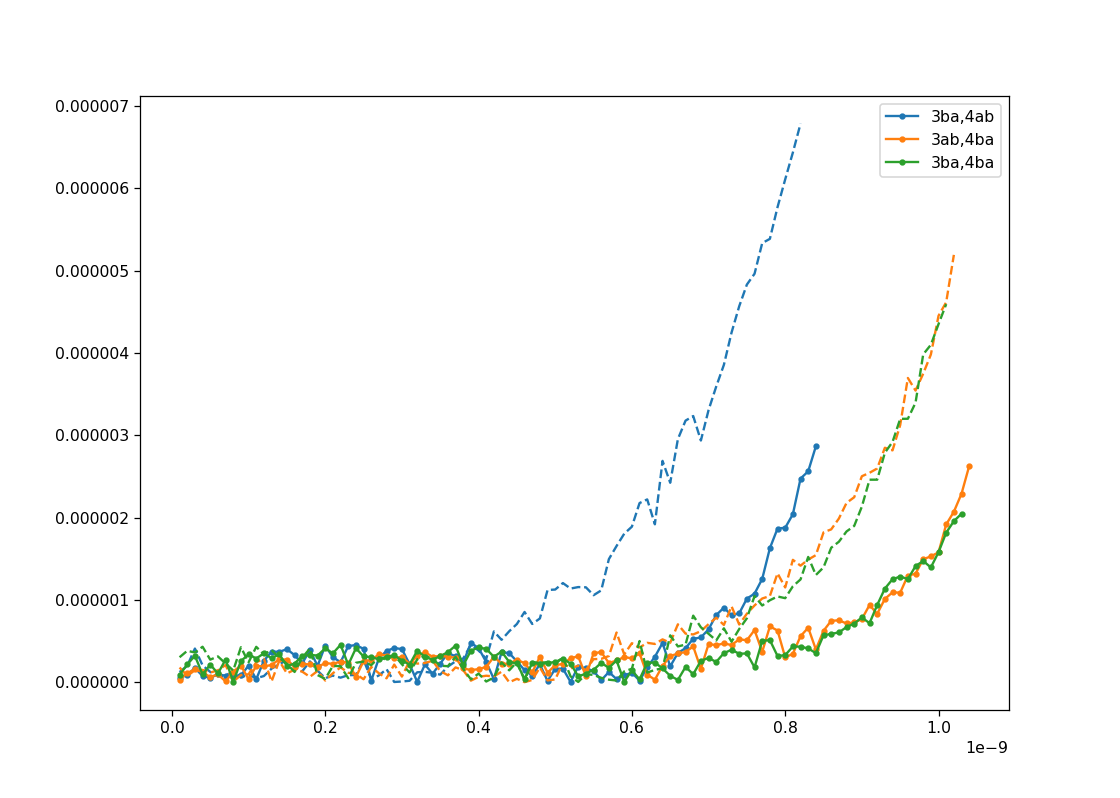

In [23]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(15)]

for i, exp in enumerate(exps[-3:]):
    
    ind = load_by_key(exp, 'cos', 0.99)
    
    I, V = exp['Ils'][ind], exp['Vls'][ind]
    ax.plot(abs(I), abs(V), '.-', c = cs[i], label = exp['pin'])
    
    I, V = exp['Irs'][ind], exp['Vrs'][ind]
    ax.plot(abs(I), abs(V), '--', c = cs[i])
    
ax.legend()

## Isw(T)

<IPython.core.display.Javascript object>


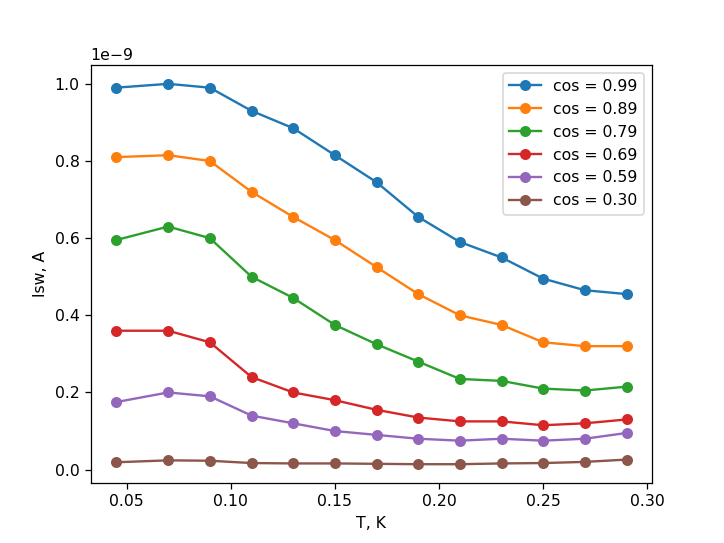

Text(0, 0.5, 'Isw, A')

In [190]:
fig, ax = plt.subplots()

# for cos in [    .3, .25]:    
for cos in [ 0.99, 0.89, 0.79, 0.69, 0.59, .3]:    
    Ts   = [exp['T'] for exp in exps]
    Isws = [exp['Isws'][load_by_key(exp, 'cos', cos)] for exp in exps]

    ax.plot(Ts, Isws, 'o-', label = 'cos = {:1.2f}'.format(cos) )
    
    
ax.legend()

ax.set_xlabel('T, K')
ax.set_ylabel('Isw, A')

# ax.set_yscale('log') 

<IPython.core.display.Javascript object>


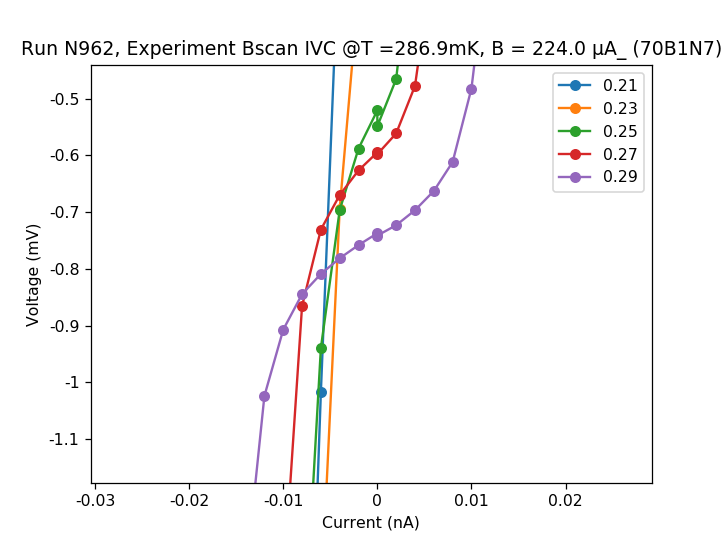

In [27]:
fig, ax = plt.subplots()

for exp in exps[-5:]:

#     plot_by_key(exp, 'cos', 0.39, ax, ls = '-')
    ind = load_by_key(exp, 'cos', 0.01)
    
    plot_by_id(exp['ids'][ind], ax, label = str(exp['T']), marker = 'o', ls = '-')
    
ax.legend()



## R0(T)

<IPython.core.display.Javascript object>


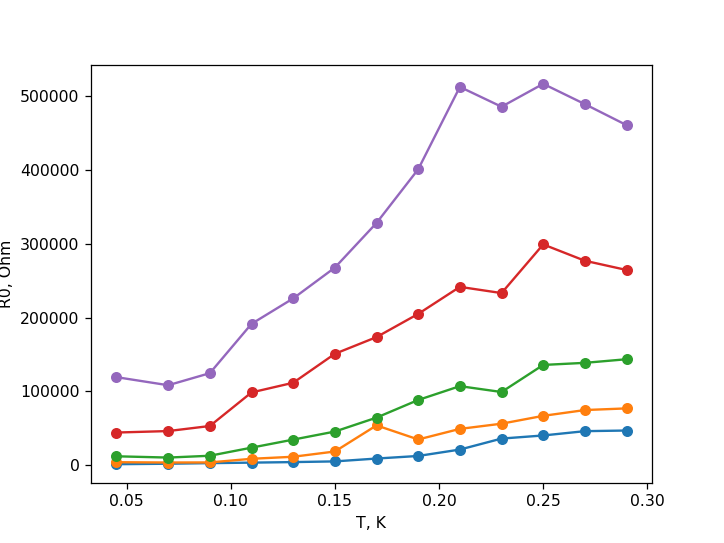

Text(0, 0.5, 'R0, Ohm')

In [134]:
fig, ax = plt.subplots()

for cos in [ 0.99, 0.89, 0.79, 0.69, 0.59]:       
    Ts   = [exp['T'] for exp in exps]
    Isws = [exp['R0s'][load_by_key(exp, 'cos', cos)] for exp in exps]

    ax.plot(Ts, Isws, 'o-')

# ax.set_yscale('log')    


ax.set_xlabel('T, K')
ax.set_ylabel('R0, Ohm')

## batch plotting

<IPython.core.display.Javascript object>


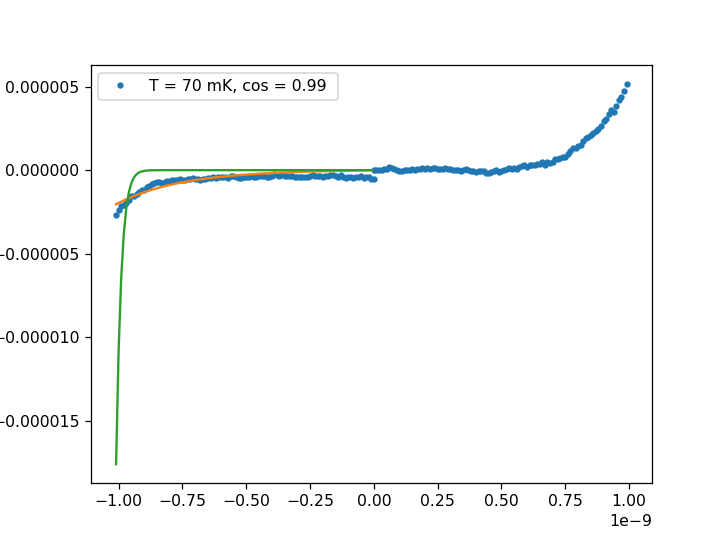

[0.07462187 0.00396337]


In [102]:
fig, ax = plt.subplots()


cos = .99


I, V = plot_by_key(exps[1], 'cos', cos , ax, marker = '.')

l = len(I)//2
I, V = I[l:], V[l:]

V_fit = lambda x, A,B  : A*np.sinh(x*B)
popt1 = ( 1e-3 , 1e-2 )
popt, pcov = curve_fit(V_fit, I/1e-12 , V/1e-6, p0 = popt1 )
#                            bounds = ( (0., 0.) , (2.5, 1.)) )

Vs = V_fit(I/1e-12, *popt)*1e-6

ax.plot(I, Vs)

Vs = V_AH_star( I,  EJ = 0.03, Rn = 1e3,  T = .0006)
ax.plot(I, 1e5*Vs)
print(popt)



In [341]:
# R_env = 377

# exp = exps[0]
# Tb = exp['T']
# V_KM(Is / Ic0 , EJ = EJ0, Ec = .2, Q = 70*cos**0, T = .50)
V_fit = lambda x, EJ0, Tn  : V_KM( x , EJ = EJ0, Ec = .2, Q = 70*cos**0, T = Tn)

<IPython.core.display.Javascript object>


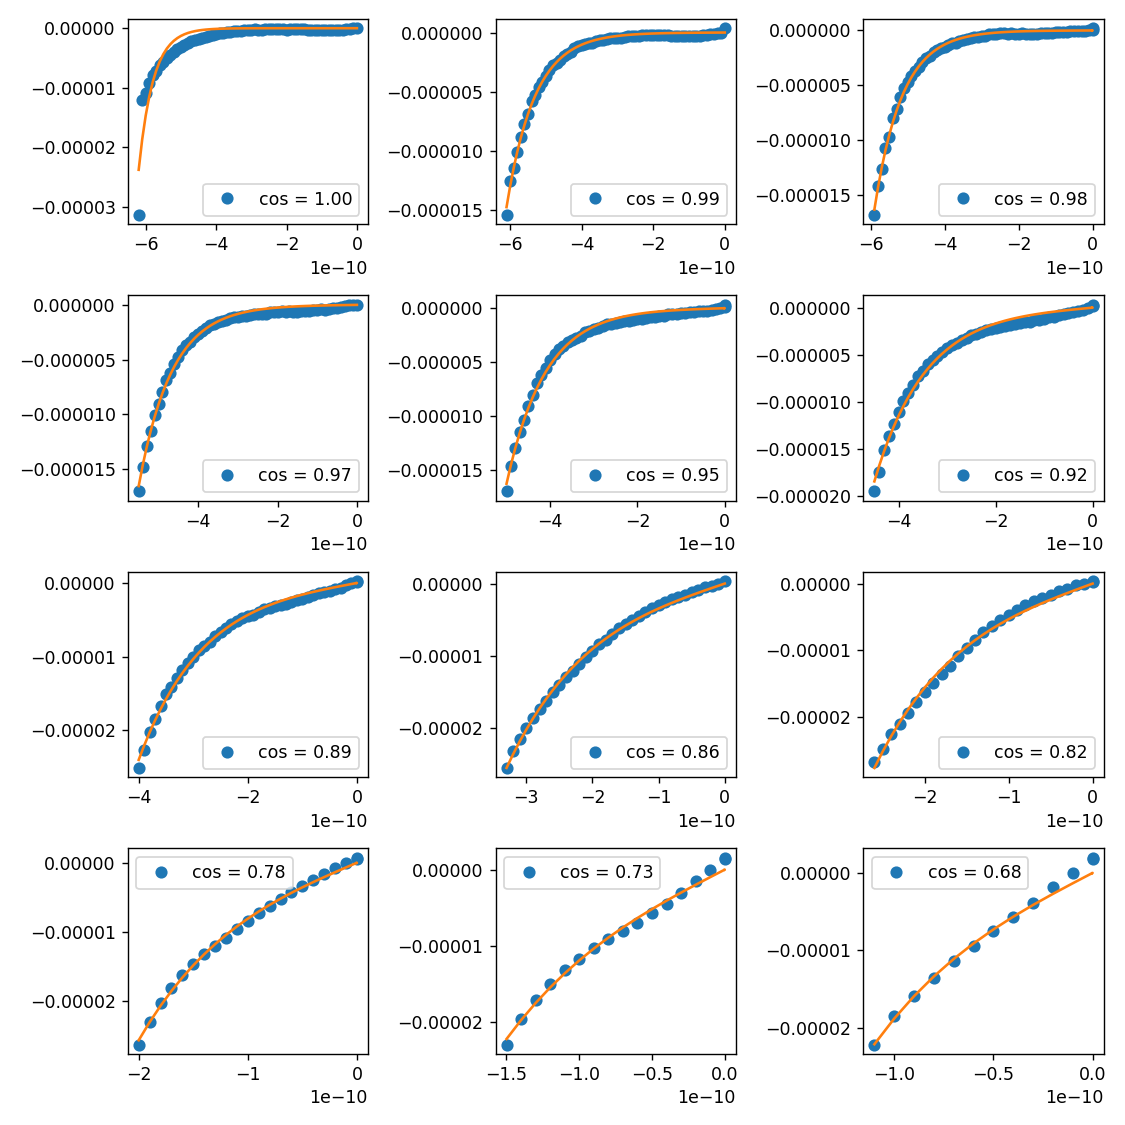

[1.41042362e-05 5.09824067e-03]
[0.01284646 0.00269586]
[0.01210291 0.00290383]
[0.04485734 0.00268551]
[0.11467092 0.00263568]
[0.517881   0.00233292]
[1.68095555 0.0022019 ]
[4.09162328e+00 2.17619015e-03]
[5.01757951e+00 2.88613234e-03]
[6.55768113e+00 3.59182729e-03]
[9.12921724e+00 4.24720913e-03]
[8.99282067e+00 6.72072164e-03]


In [200]:
R_env = 1e3
Cj = 1.5e-15


EJ0= .04


EJs = []
Tns = []
coss = []

exp = exps[-1]

fig = plt.figure(figsize = (9,9))
gs = GridSpec.GridSpec(4, 3)

for i in range(12):
# for i, j in enumerate([0,3,4,5,6,7,8, 11, 12, 14,15,16]):
    
    ax = fig.add_subplot(gs[i] )
    
    j = 2*i+1
    cos = exp['cos'][j]
    I, V = exp['Is'][j] , exp['Vs'][j]
    
    ax.plot( I, V , 'o' ,label = 'cos = {:1.2f}'.format(cos))


    
    Tb = exp['T']
    
    V_fit = lambda x, A,B  : A*np.sinh(x*B*cos**2/Tb)
    popt1 = ( 1e-6 , 1e-3)
    popt, pcov = curve_fit(V_fit, I/1e-12 ,V/1e-6, p0 = popt1 )
    
#     V_fit = lambda x, EJ0, Tn  : 1e6*V_KM( x*1e-12 , EJ = EJ0, Ec = .2, Q = 70, T = Tn)

#     popt1 = ( 1.4*cos**2 , .5)
#     popt, pcov = curve_fit(V_fit, exp['Is'][i]/1e-12 ,exp['Vs'][i]/1e-6, p0 = popt1 )
# #                            bounds = ( (0., 0.) , (2.5, 1.)) )

    Vs = V_fit(I/1e-12, *popt)*1e-6

    ax.plot(I, (Vs ))

    print(popt)
    

    ax.legend()
    
    plt.tight_layout()

In [177]:
EJs = []
Tns = []
coss = []




exp = exps[-2]

for j, cos in enumerate(exp['cos']):
    
    I, V = exp['Ils'][j] , exp['Vls'][j]
    
    Tb = exp['T']
    
    V_fit = lambda x, A,B  : A*np.sinh(x*B/Tb)
#     V_fit = lambda x, A,B  : A*cos**2*np.sinh(x*B*cos**2/Tb)

    popt1 = ( 1e-2 , 3e-3)
    popt, pcov = curve_fit(V_fit, I/1e-12 ,V/1e-6, p0 = popt1 )
    

    print(popt, cos)
    
    EJ, Tn = popt[0], popt[1] 

    EJs.append(EJ)
    Tns.append(Tn)
    coss.append(cos)


[0.50862305 0.00256582] 1.0
[0.66666874 0.00241098] 0.9993628256569916
[0.1384088  0.00348161] 0.9974521146102535
[0.46643855 0.00268352] 0.9942703017718973
[1.02907031 0.00228229] 0.9898214418809327
[0.3715954  0.00309634] 0.9841112043361161
[1.2260074  0.00229876] 0.9771468659711595
[1.58058518 0.00222381] 0.9689373017815073
[2.38259355e+00 2.04340799e-03] 0.9594929736144974
[3.12995421e+00 1.96914405e-03] 0.9488259168373196
[3.88644960e+00 1.95354136e-03] 0.9369497249997617
[4.58211713e+00 1.96318597e-03] 0.9238795325112867
[6.28581595e+00 1.86225562e-03] 0.9096319953545183
[6.93101704e+00 1.92750407e-03] 0.8942252698597113
[7.43474166e+00 2.05392017e-03] 0.8776789895672555
[7.75722335e+00 2.16899951e-03] 0.8600142402077006
[7.86494142e+00 2.34932390e-03] 0.8412535328311812
[9.87327979e+00 2.20168591e-03] 0.8214207751204915
[1.40368473e+01 1.87464485e-03] 0.8005412409243604
[1.64135399e+01 1.77416323e-03] 0.7786415380497552
[1.90500071e+01 1.71800403e-03] 0.7557495743542584
[1.13710

D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[21.89688124  0.09824446] 0.07133918319923235
[23.12915465  0.10984291] 0.035692333838980496
[37.12317447  0.09563262] 6.123233995736766e-17
[21.11272184  0.11840744] 0.03569233383898059
[16.65649337  0.11223071] 0.07133918319923224
[25.37705272  0.06882225] 0.10689512156511288
[23.00587733  0.06146825] 0.14231483827328542
[18.24958448  0.05560305] 0.17755319625430332
[27.65145907  0.03488262] 0.2125652895529767


<IPython.core.display.Javascript object>


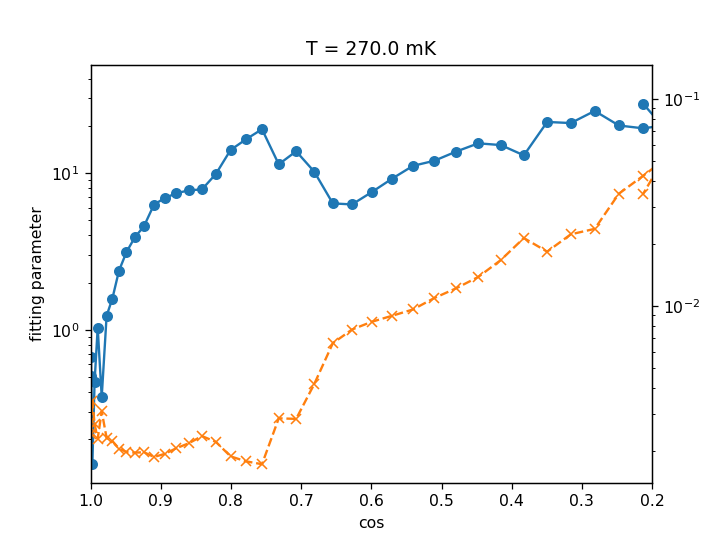

In [178]:
fig, ax = plt.subplots()

ax.plot(coss, EJs, 'o-')
# ax.set_ylim(0, 1.5)
ax.set_yscale('log')
ax2 = ax.twinx()

ax2.plot(coss, Tns, 'x--', c = 'C1')
# ax2.set_ylim(0, 1)

ax.set_xlim(1, 0.2)


ax.set_xlabel('cos')
ax.set_ylabel('fitting parameter')

ax.set_title ('T = {:2.1f} mK'.format(exp['T']*1e3) )
ax2.set_yscale('log')

In [711]:
exps[-1]['B']

array([4.000e-06, 9.500e-06, 1.500e-05, 2.050e-05, 2.600e-05, 3.150e-05,
       3.700e-05, 4.250e-05, 4.800e-05, 5.350e-05, 5.900e-05, 6.450e-05,
       7.000e-05, 7.550e-05, 8.100e-05, 8.650e-05, 9.200e-05, 9.750e-05,
       1.030e-04, 1.085e-04, 1.140e-04, 1.195e-04, 1.250e-04, 1.305e-04,
       1.360e-04, 1.415e-04, 1.470e-04, 1.525e-04, 1.580e-04, 1.635e-04,
       1.690e-04, 1.745e-04, 1.800e-04, 1.855e-04, 1.910e-04, 1.965e-04,
       2.020e-04, 2.075e-04, 2.130e-04, 2.185e-04, 2.240e-04, 2.295e-04,
       2.350e-04, 2.405e-04, 2.460e-04, 2.515e-04, 2.570e-04, 2.625e-04,
       2.680e-04, 2.735e-04, 2.790e-04])

<IPython.core.display.Javascript object>


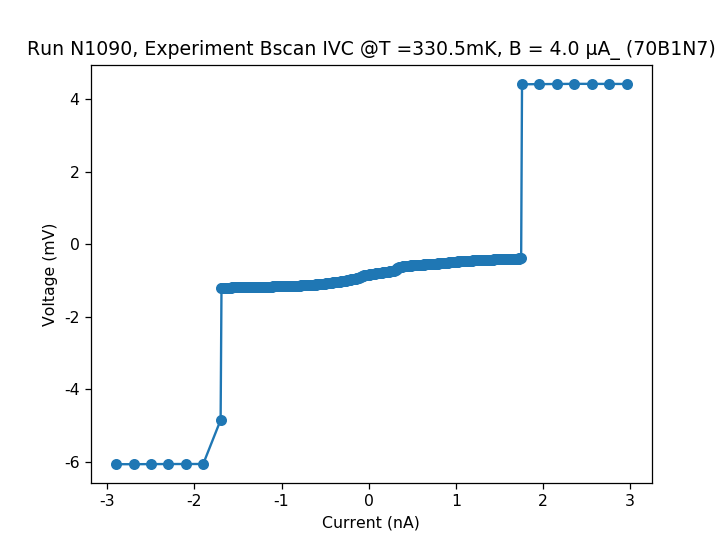

([<matplotlib.axes._subplots.AxesSubplot at 0x1e18c879b00>], [None])

In [180]:
plot_by_id(1090, marker = 'o')

## IVCs (cos)

<IPython.core.display.Javascript object>


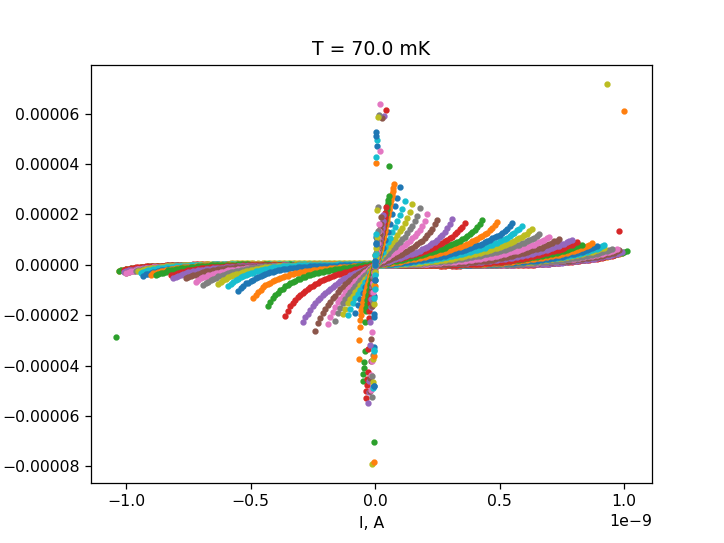

In [186]:
fig, ax = plt.subplots()


exp = exps[1]
for cos in exp['cos']:
    
    plot_by_key(exp, 'cos', cos, ax, marker = '.')
    

ax.set_title('T = {:2.1f} mK'.format(exp['T'] *1e3)) 

ax.set_xlabel('I, A')
ax.set_ylabel('V, V')
    
ax.legend().remove()